# EDA Assignment 

## Risk Analytics in Banking and Financial services Case Study

### Business Understanding:

#### Problem statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

1. Approved: The Company has approved loan Application
2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

### Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Data Understanding


Let us start by importing useful libraries and understanding the data available with us.

In [1]:
#Importing the useful libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Dataset -1:  application_data

### Step-1: Data Sourcing

In [2]:
# Reading the dataset 'application_data'

applications = pd.read_csv('application_data.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
applications.shape

(307511, 122)

We have now loaded our first dataset 'application_data.csv' into our system. As we can see this dataset has 122 columns. Let us now check the columns for any irregularities present in it. Irregularities may appear in the form of missing values, anomalies/outliers, incorrect format and inconsistent spelling, etc Let us check each one by one.

Next step is cleaning the dataset

### Step-2: Data Cleaning - Data Quality Check and Missing Values

Steps to be followed:

1. Identifying the data types

2. Imputing/removing missing values

4. Handling outliers

5. Standardising the values

6. Binning


In [5]:
# we will first check the data types of all the variables present

applications.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
# Checking if there are any duplicated rows

applications.duplicated().sum()


0

There's no duplicated rows. Great!. Now we can proceed with identifying null values in each columns. Let us find out the percentage of null values in each columns


In [7]:
#checking percentage of null values
applications.isnull().mean().round(4)* 100


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [8]:
# checking for columns having null values > 40%. These columns have very high missing values, its better to drop them.
nv_above40 = (applications.isnull().mean().round(4) * 100) >=40
nv_above40.value_counts()

False    73
True     49
dtype: int64

In [9]:
# storing the null valves above 40% into a list and dropping
drop_col = applications.columns[nv_above40].tolist()

# dropping columns
applications.drop(drop_col, axis=1, inplace=True)

In [10]:
#checking the size of the dataset
applications.shape

(307511, 73)

In [11]:
#Dropping a few other irrelevant columns that wont be of any use in the analysis

drop_list=['NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 
           'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 
           'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']  

applications.drop(drop_list, axis=1, inplace=True)

In [12]:
# Removing rows from columns having with missing values <10% as it wont affect our analysis.

applications=applications[~applications.AMT_ANNUITY.isnull()]
applications=applications[~applications.AMT_GOODS_PRICE.isnull()]
applications=applications[~applications.CNT_FAM_MEMBERS.isnull()]
applications=applications[~applications.DAYS_LAST_PHONE_CHANGE.isnull()]

Some columns have around 13% of missing values and as these are categorical variables, we can impute missing values with Mode values.

In [13]:
# Imputing categorical columns with mode values.

applications['AMT_REQ_CREDIT_BUREAU_HOUR']=applications['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(applications['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
applications['AMT_REQ_CREDIT_BUREAU_DAY']=applications['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(applications['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
applications['AMT_REQ_CREDIT_BUREAU_WEEK']=applications['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(applications['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
applications['AMT_REQ_CREDIT_BUREAU_MON']=applications['AMT_REQ_CREDIT_BUREAU_MON'].fillna(applications['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
applications['AMT_REQ_CREDIT_BUREAU_QRT']=applications['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(applications['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
applications['AMT_REQ_CREDIT_BUREAU_YEAR']=applications['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(applications['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])


In [14]:
# Column 'Occupation_Type' has 31% missing values.
# we cannot remove them as these seems to be Missing not at random. so we just replace NaN's with 'Missing' 

applications['OCCUPATION_TYPE']=applications['OCCUPATION_TYPE'].fillna('Missing')
applications['OCCUPATION_TYPE'].value_counts()

Missing                  96333
Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
# rechecking null values
applications.isnull().mean().round(6)* 100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT

#### Data Outliers checking

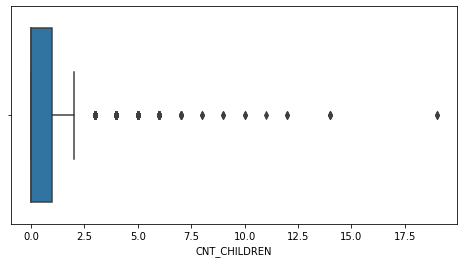

In [16]:
# Checking outliers on CNT_CHILDREN column

plt.figure(figsize=[8,4])
sns.boxplot(applications.CNT_CHILDREN)
plt.show()


In [17]:
applications.CNT_CHILDREN.quantile([0.5, 0.9, 0.95, 0.99, 0.999])

0.500    0.0
0.900    2.0
0.950    2.0
0.990    3.0
0.999    4.0
Name: CNT_CHILDREN, dtype: float64

As we can see that 99% of applicants have upto 2-3 children and a very neglible % of applicants have more than 3 children. However, we shall not drop it yet

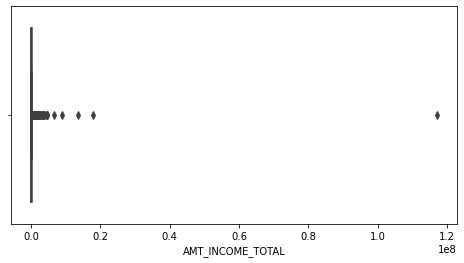

In [18]:
#Checking outliers on AMT_INCOME_TOTAL

plt.figure(figsize=[8,4])
sns.boxplot(applications.AMT_INCOME_TOTAL)
plt.show()


In [19]:
applications.AMT_INCOME_TOTAL.describe()

count    3.072200e+05
mean     1.688327e+05
std      2.372203e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [20]:
applications['AMT_INCOME_TOTAL'].quantile([0, 0.1, 0.3, 0.6, 0.9,1])

# The difference between the 90th percentile and max value is too high. 
# but we cannot remove the outliers as this may affect our analysis. These people might just have huge pay (Rich people)

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.9       270000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

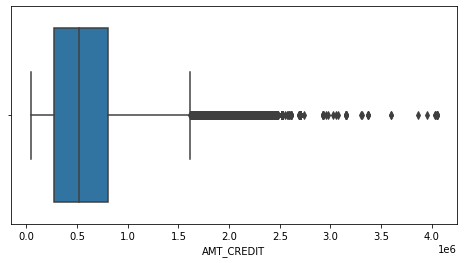

In [21]:
#Checking outliers on AMT_CREDIT

plt.figure(figsize=[8,4])
sns.boxplot(applications.AMT_CREDIT)
plt.show()

In [22]:
applications.AMT_CREDIT.describe()

count    3.072200e+05
mean     5.993174e+05
std      4.025198e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.146020e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [23]:
applications['AMT_CREDIT'].quantile([0, 0.1, 0.3, 0.6, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we cannot remove the outliers as this may affect our analysis.

0.0      45000.0
0.1     180000.0
0.3     307557.0
0.6     604413.0
0.9    1133748.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

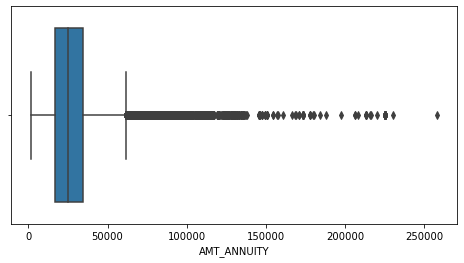

In [24]:
#Checking outliers on AMT_ANNUITY
plt.figure(figsize=[8,4])
sns.boxplot(applications.AMT_ANNUITY)
plt.show()

In [25]:
applications.AMT_ANNUITY.describe()

count    307220.000000
mean      27120.456294
std       14492.130232
min        1615.500000
25%       16551.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [26]:
applications['AMT_ANNUITY'].quantile([0, 0.1, 0.3, 0.6, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we cannot remove the outliers as this may affect our analysis.

0.0      1615.5
0.1     11074.5
0.3     18216.0
0.6     28075.5
0.9     45954.0
1.0    258025.5
Name: AMT_ANNUITY, dtype: float64

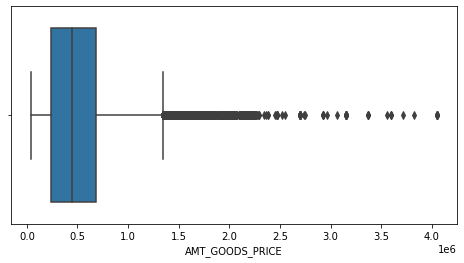

In [27]:
#Checking outliers on AMT_GOODS_PRICE

plt.figure(figsize=[8,4])
sns.boxplot(applications.AMT_GOODS_PRICE)
plt.show()


In [28]:
applications.AMT_GOODS_PRICE.describe()

count    3.072200e+05
mean     5.383983e+05
std      3.694486e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [29]:
applications['AMT_GOODS_PRICE'].quantile([0, 0.1, 0.3, 0.6, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we cannot remove the outliers as this may affect our analysis.

0.0      40500.0
0.1     180000.0
0.3     270000.0
0.6     522000.0
0.9    1093500.0
1.0    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [30]:
# Days values are in negative. converting values from 'days' columns into positive values. 

applications['DAYS_BIRTH'] = applications['DAYS_BIRTH'].abs()
applications['DAYS_EMPLOYED'] = applications['DAYS_EMPLOYED'].abs()
applications['DAYS_REGISTRATION'] = applications['DAYS_REGISTRATION'].abs()
applications['DAYS_LAST_PHONE_CHANGE'] = applications['DAYS_LAST_PHONE_CHANGE'].abs()

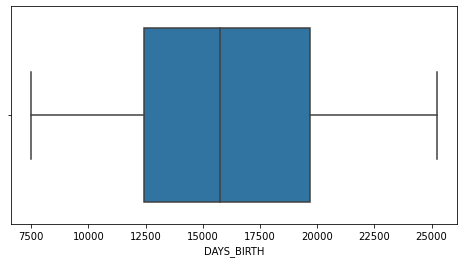

In [31]:
#checking outliers on DAYS_BIRTH
plt.figure(figsize=[8,4])
sns.boxplot(applications.DAYS_BIRTH)
plt.show()

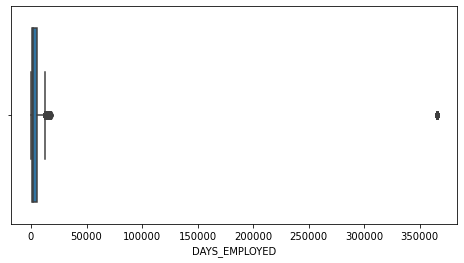

In [32]:
#checking outliers on DAYS_EMPLOYED
plt.figure(figsize=[8,4])
sns.boxplot(applications.DAYS_EMPLOYED)
plt.show()

In [33]:
applications.DAYS_EMPLOYED.quantile([0.5,0.6,0.7,0.8,0.82 ,0.85, 0.9, 0.95 , 0.99, 0.9995])

# We can see here that 365243 is an error value. 
# These seem to be some random errors. As we cannot remove them, we will just do np.nan for these high values

0.5000      2219.0
0.6000      3033.0
0.7000      4438.0
0.8000      9200.0
0.8200    365243.0
0.8500    365243.0
0.9000    365243.0
0.9500    365243.0
0.9900    365243.0
0.9995    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [34]:
applications.loc[applications.DAYS_EMPLOYED>81,'DAYS_EMPLOYED'] = np.NaN

In [35]:
# rechecking the updated dataset

applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,NaN,3648.0,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,NaN,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,NaN,4260.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,NaN,9833.0,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,NaN,4311.0,1,1,0,1,0,0,Core staff,1.0,2,2,0,1,1,Religion,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Standardizing Values

In [36]:
# Create age column and convert age from days to years. We created this age column as we can later do binning and analyse the data as per age group.

applications['AGE'] = applications.DAYS_BIRTH//365

In [37]:
# Merging few columns for better analysis
# Let us now check how many documents each applicant has provided us. 
# As we dont know exactly which documents they are, we can just merge them together and drop all the flag columns.

applications['DOCUMENTS_PROVIDED'] = applications.loc[:, 'FLAG_DOCUMENT_2': 'FLAG_DOCUMENT_21'].sum(axis=1)
applications.drop(columns = applications.loc[:, 'FLAG_DOCUMENT_2': 'FLAG_DOCUMENT_21'].columns, inplace=True)

In [38]:
# Checking Gender column
applications.CODE_GENDER.value_counts()


F      202251
M      104965
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
# Let us make this gender column more readable. 
# We will create a new column with proper readable values and drop this code column

applications['GENDER']=applications['CODE_GENDER'].replace(['M','F','XNA'],['Male','Female','Other'])
applications.drop('CODE_GENDER', axis=1, inplace=True)
applications.GENDER.value_counts()

Female    202251
Male      104965
Other          4
Name: GENDER, dtype: int64

In [40]:
# Name_Education_Type

applications['NAME_EDUCATION_TYPE']=applications['NAME_EDUCATION_TYPE'].apply(lambda x:x.replace('Secondary / secondary special','Secondary'))
applications.NAME_EDUCATION_TYPE.value_counts()

Secondary            218186
Higher education      74793
Incomplete higher     10265
Lower secondary        3812
Academic degree         164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [41]:
# name_family_status 

applications.NAME_FAMILY_STATUS = applications.NAME_FAMILY_STATUS.apply(lambda x:x.replace('Single / not married','Single'))
applications.NAME_FAMILY_STATUS = applications.NAME_FAMILY_STATUS.apply(lambda x:x.replace('Civil marriage','Married'))
applications.NAME_FAMILY_STATUS.value_counts()

Married      226006
Single        45383
Separated     19757
Widow         16074
Name: NAME_FAMILY_STATUS, dtype: int64

#### Binning

In [42]:
#Creating age_group column using binning so we can analyse data as per age groups.

applications['AGE_GROUP'] = pd.cut(x=applications['AGE'], bins= [20,30,40,50, 60,70 ], labels=['21-30', '31-40', '41-50', '51-60', '61-70'], right=False)
applications.AGE_GROUP.value_counts()

31-40    82204
41-50    76478
51-60    68038
21-30    44921
61-70    35579
Name: AGE_GROUP, dtype: int64

In [43]:
#Creating INCOME_GROUP column using binning so we can analyse data.

applications['INCOME_GROUP']=pd.qcut(applications['AMT_INCOME_TOTAL'], q=[0, 0.1, 0.3, 0.6, 0.9, 1], labels=['VeryLow','Low','Medium','High','VeryHigh'])
applications['INCOME_GROUP'].value_counts()

High        95420
Medium      84239
Low         67086
VeryLow     33328
VeryHigh    27147
Name: INCOME_GROUP, dtype: int64

In [44]:
# rechecking the updated dataset

applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,DOCUMENTS_PROVIDED,GENDER,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary,Single,House / apartment,0.018801,9461,NaN,3648.0,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,Male,21-30,High
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,NaN,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1,Female,41-50,High
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary,Single,House / apartment,0.010032,19046,NaN,4260.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,Male,51-60,VeryLow
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary,Married,House / apartment,0.008019,19005,NaN,9833.0,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,617.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,Female,51-60,Medium
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary,Single,House / apartment,0.028663,19932,NaN,4311.0,1,1,0,1,0,0,Core staff,1.0,2,2,0,1,1,Religion,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54,1,Male,51-60,Medium


In [45]:
applications.shape

(307220, 44)

### Step 3 - Analysis

#### Checking Imbalance

In [46]:
# First step in our Analysis part would be checking the imbalance percentage in this dataset.

round(applications['TARGET'].value_counts(normalize=True)*100)

0    92.0
1     8.0
Name: TARGET, dtype: float64

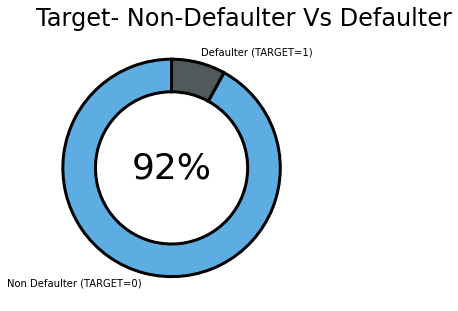

In [47]:
#Let us plot a Doughnut chart to visualize this information.

fig, ax = plt.subplots(figsize=(5, 5))
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}
labels = ['Non Defaulter (TARGET=0)', 'Defaulter (TARGET=1)']
ax.pie([92,8], wedgeprops=wedgeprops, startangle=90, labels = labels, colors=['#5DADE2', '#515A5A'])
plt.title('Target- Non-Defaulter Vs Defaulter', fontsize=24, loc='left')
plt.text(0, 0, "92%", ha='center', va='center', fontsize=36)
plt.show()

This shows us that we have 92% of applicants who are Non-Defaulters and only 8% of them are Defaulters. This is not bad. Let us now divide our data into two sets - Target=1 and Target=0 and perform some more analysis on them. 

In [48]:
# Dividing the complete dataset into two datasets: 
# Non-Defaulter data set

df_0 = applications[applications['TARGET']==0]

# Defaulter data set

df_1 = applications[applications['TARGET']==1]

In [49]:
# Univariate Analysis for Categorical variables for both df_0 and df_1

In [50]:
df_0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object


#### Univariate Analysis - Categorical 

We will perform some univariate analysis on a few Categorical columns

In [51]:
# NAME_CONTRACT_TYPE 

print('df_0\n', round(df_0.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100))
print('df_1\n', round(df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100))

df_0
 Cash loans         90.0
Revolving loans    10.0
Name: NAME_CONTRACT_TYPE, dtype: float64
df_1
 Cash loans         94.0
Revolving loans     6.0
Name: NAME_CONTRACT_TYPE, dtype: float64


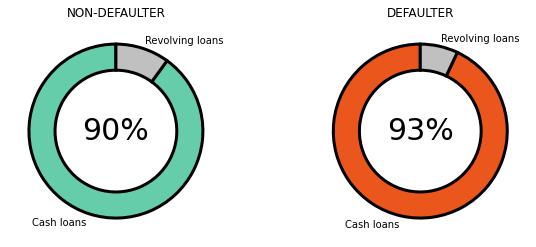

In [52]:
#Doughnut plot for NAME_CONTRACT_TYPE 

wedgeprops = {'width':0.3 , 'edgecolor':'black', 'linewidth':3}
labels = ['Cash loans', 'Revolving loans']
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('NON-DEFAULTER', fontsize=12, loc='center')
plt.pie([90,10], wedgeprops=wedgeprops, startangle=90, labels = labels, colors=['#66CDAA', '#C0C0C0'])
plt.text(0, 0, "90%", ha='center', va='center', fontsize=30)


plt.subplot(122)
plt.title('DEFAULTER', fontsize=12, loc='center')
plt.pie([93,7], wedgeprops=wedgeprops, startangle=90, labels = labels, colors=['#EA561B', '#C0C0C0'])
plt.text(0, 0, "93%", ha='center', va='center', fontsize=30)

plt.show()


-  We can see maximum of the applicants prefer cash loans.
-  Defaulters also have taken mostly cash loans
-  The ratio of both Non-defaulters and Defaulters seems to be similar, so we cannot conclude the basis of defaulters based on loan types

In [53]:
# FLAG_OWN_CAR

print('df_0\n', round(df_0.FLAG_OWN_CAR.value_counts(normalize=True)*100))
print('df_1\n', round(df_1.FLAG_OWN_CAR.value_counts(normalize=True)*100))

df_0
 N    66.0
Y    34.0
Name: FLAG_OWN_CAR, dtype: float64
df_1
 N    69.0
Y    31.0
Name: FLAG_OWN_CAR, dtype: float64


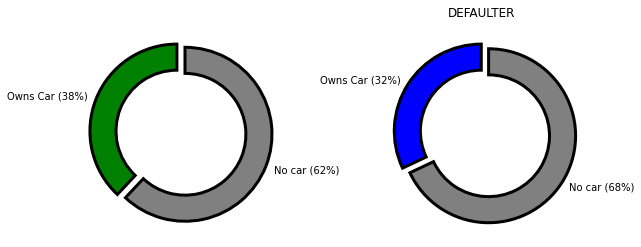

In [54]:
# Doughnut chart for FLAG_OWN_CAR

wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}
plt.figure(figsize=(10,4))

plt.subplot(121)

plt.pie([38,62], wedgeprops=wedgeprops, startangle=90, labels = ['Owns Car (38%)', 'No car (62%)'], colors=['green', 'grey'], explode=(0,0.1))

plt.subplot(122)
plt.title('DEFAULTER', fontsize=12, loc='center')
plt.pie([32,68], wedgeprops=wedgeprops, startangle=90, labels = ['Owns Car (32%)', 'No car (68%)'], colors=['blue', 'grey'], explode=(0,0.1))


plt.show()

-  Here we can see that most of the applicants who has applied for loans do not own a car.
-  Maximum applicants that are defaulters do not own a car.
-  However, the ratio of No. of applicants who dont own a car is similar in both cases, so we cannot conclude 

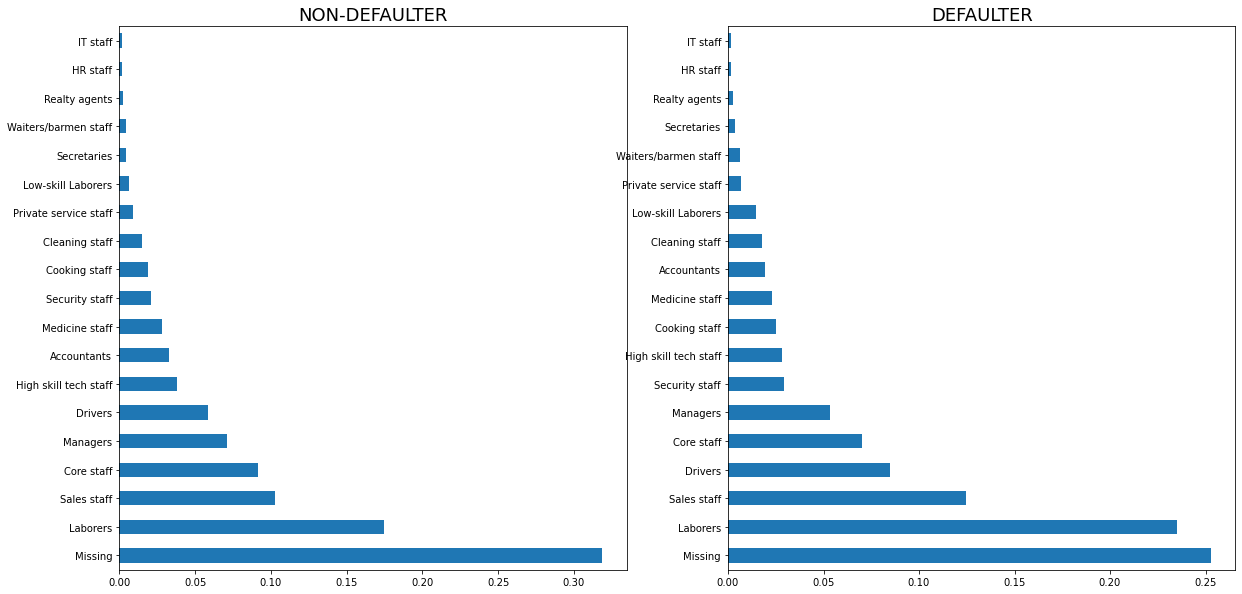

In [55]:
# Analysing with OCCUPATION_TYPE

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
df_0['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.title('NON-DEFAULTER', fontsize=18, loc='center')

plt.subplot(1,2,2)
df_1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.title('DEFAULTER', fontsize=18, loc='center')
plt.show()

-  Looking the Occupation chart, loans are taken by the crowd having occupation as Labors, sales staff, core staff etc. These people make less money. so makes sense they need loans to meet their needs.

- here we can also say that more number of defaults happens with laborers, sales staff, drivers etc
- People from IT, HR, reality agents, secretaries etc require very less amount of loans. 
- A lot of missing values are present.

In [56]:
#defining a function to plot univariate categorical values

def count_plot(cat):

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))  
    sns.countplot(x=cat, data=df_0, ax=ax1)
    ax1.set_title('NON-DEFAULTER',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

    sns.countplot(x=cat, data=df_1, ax=ax2)
    ax2.set_title('DEFAULTER',fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()

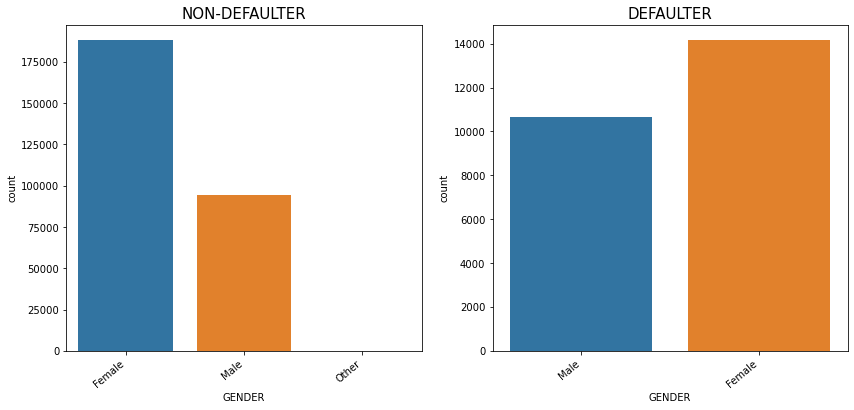

In [57]:
# GENDER

count_plot('GENDER')

-  We can observe that number of female applicants taking loan are higher 
-  Amongst the defaulters, highest proporation are also women. This might be because large number of applicants are female. 

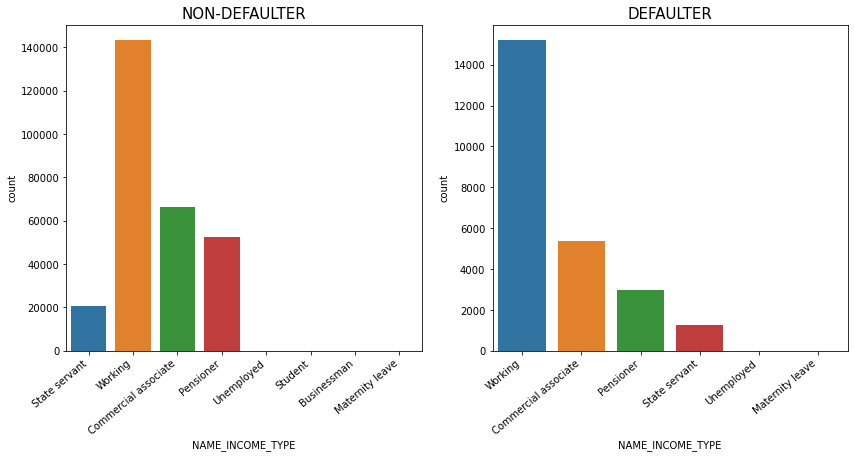

In [58]:
# NAME_INCOME_TYPE

count_plot('NAME_INCOME_TYPE')

-  We can see here that working people are more likely to apply for loans than students, or umemployed people. 
-  More number of defaulters are also working group. Makes sense obviously.
-  Next higher percentage if of commercial associates and Pensioners.

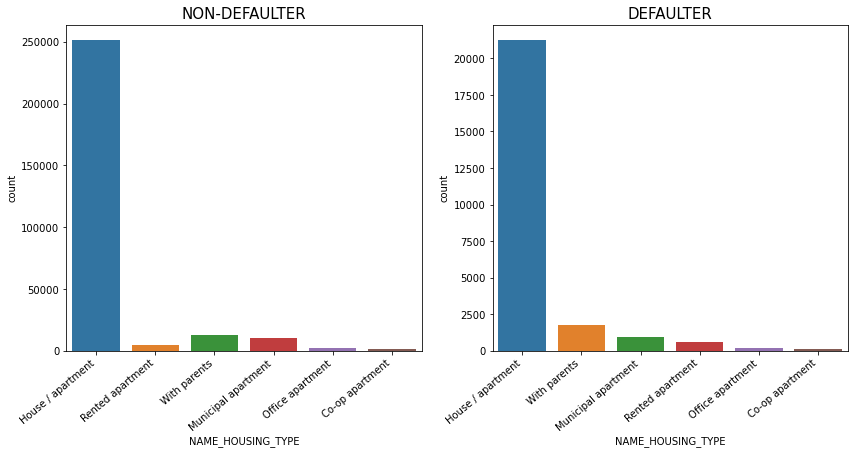

In [59]:
# NAME_HOUSING_TYPE

count_plot('NAME_HOUSING_TYPE')

-  People with having own House require loans, to buy the house probably. so are more likely to default.
-  Next higher category are people living with parents. we can say that ppl living with parents have more expenses and might be one of the reason for defaults

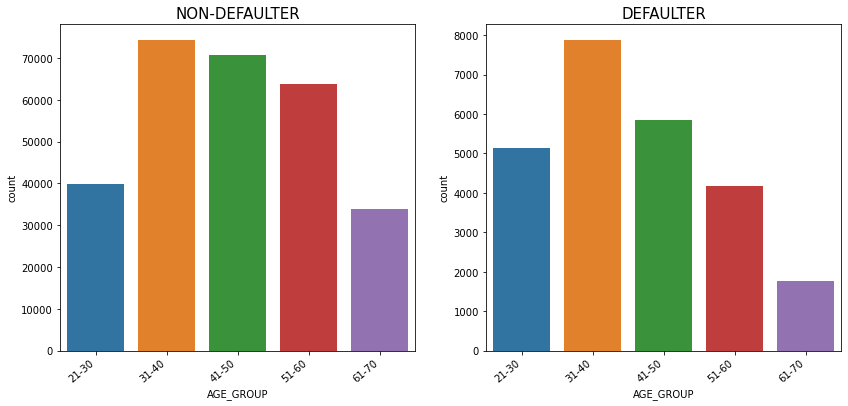

In [60]:
#AGE_GROUP 
count_plot('AGE_GROUP')

-  Folks from Age group 31-40 are more likely to be defaulters. These are also the people who take more loans, so might be the reason
-  senior citizens with age group 61-70 are less likely to default.

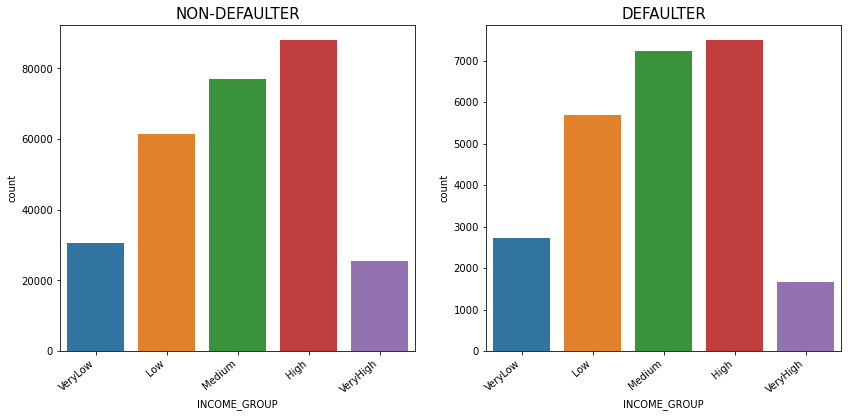

In [61]:
#INCOME_GROUP
count_plot('INCOME_GROUP')

-  The Raios seem to be similar. cannot infer based on this catagory alone

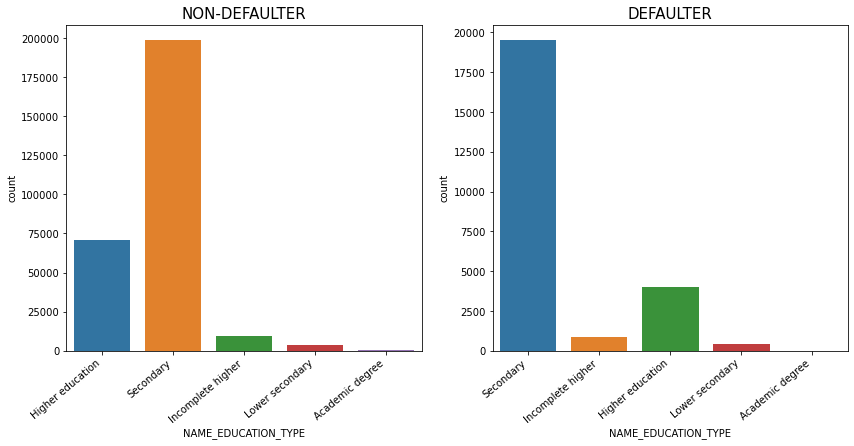

In [62]:
# NAME_EDUCATION_TYPE 

count_plot('NAME_EDUCATION_TYPE')

- People with secondary education take more loans, these are the same people who are highest defaulters
- People with higher education are the 2nd more likely to be a defaulters

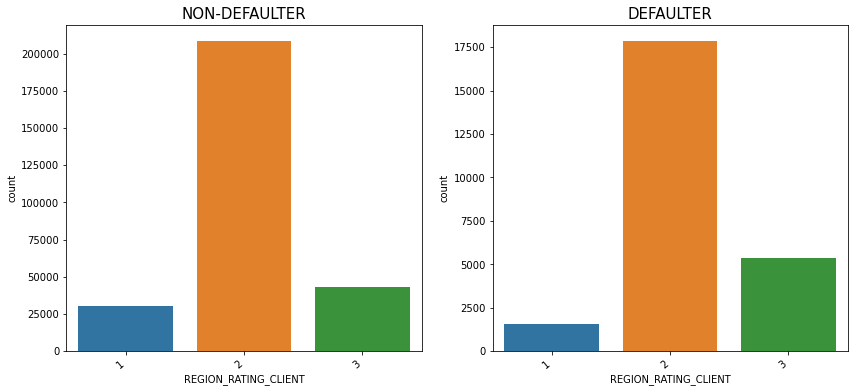

In [63]:
# REGION_RATING_CLIENT

count_plot('REGION_RATING_CLIENT')

-  Maximum number of the applicants are from the Tier 2 cities. we can say that cost of living in Tier 2 cities is less
-  Defaulter applicants are mostly from Tier 2 and Tier 3 cities. 
-  Cannot infer much information

#### Univariate analysis - Numerical 

Now, let us do some Univariate analysis on Numerical variables

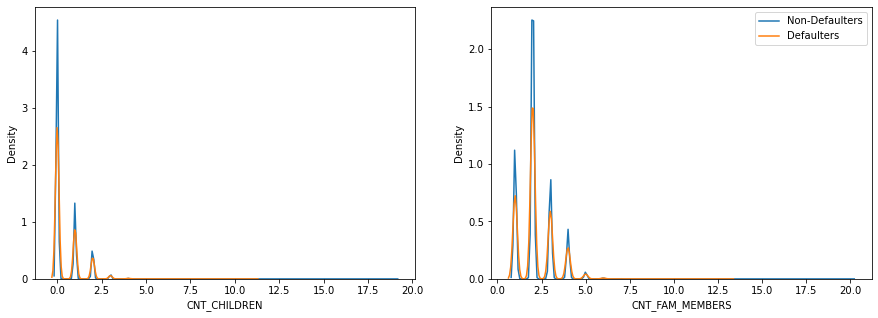

In [64]:
# distplots for CNT_CHILDREN and CNT_FAM_MEMBERS

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_0['CNT_CHILDREN'],hist=False,label='Non-Defaulters', ax=ax1)
sns.distplot(df_1['CNT_CHILDREN'],hist=False,label='Defaulters', ax=ax1)


sns.distplot(df_0['CNT_FAM_MEMBERS'],hist=False,label='Non-Defaulters', ax=ax2)
sns.distplot(df_1['CNT_FAM_MEMBERS'],hist=False,label='Defaulters', ax=ax2)


plt.legend()
plt.show()

-  From these two distplots, we can infer that maximum number of the applicants have a family size of 2-4 people.
-  The most defaulters can be seen within a small family size (1-3 people)

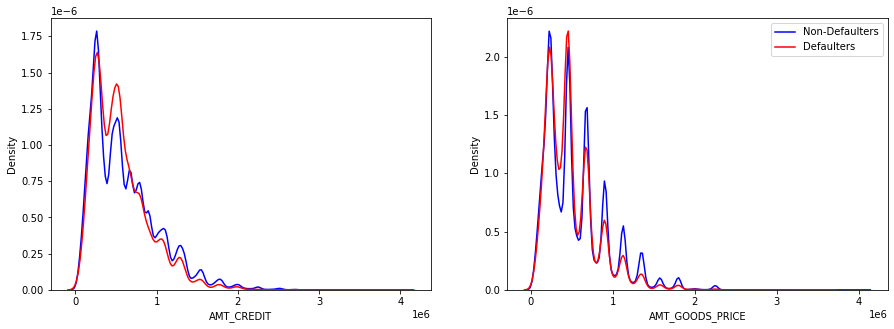

In [65]:
# distplot for AMT_CREDIT and AMT_GOODS_PRICE

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
 
sns.distplot(df_0['AMT_CREDIT'],hist=False,label='Non-Defaulters', color='blue', ax=ax1)
sns.distplot(df_1['AMT_CREDIT'],hist=False,label='Defaulters', color='red', ax=ax1)


sns.distplot(df_0['AMT_GOODS_PRICE'],hist=False,label='Non-Defaulters', color='blue', ax=ax2)
sns.distplot(df_1['AMT_GOODS_PRICE'],hist=False,label='Defaulters', color='red', ax=ax2)

plt.legend()
plt.show()

-  From These distplots we can see that the AMT_CREDIT and AMT_GOODS PRICE have almost similar kind of trend. This makes sense because AMT_CREDIT to be approved by company would be dependant on the AMT_GOODS_PRICE

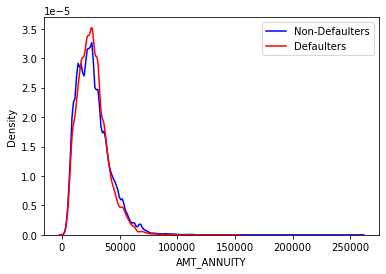

In [66]:
fig,(ax) = plt.subplots(figsize=(6,4))

sns.distplot(df_0['AMT_ANNUITY'],hist=False,label='Non-Defaulters', color='blue')
sns.distplot(df_1['AMT_ANNUITY'],hist=False,label='Defaulters', color='red')

plt.legend()
plt.show()

Cannot infer anything

#### Bivariate Analysis:  Numeric-Numeric

Lets, now look at few more Numeric variables together

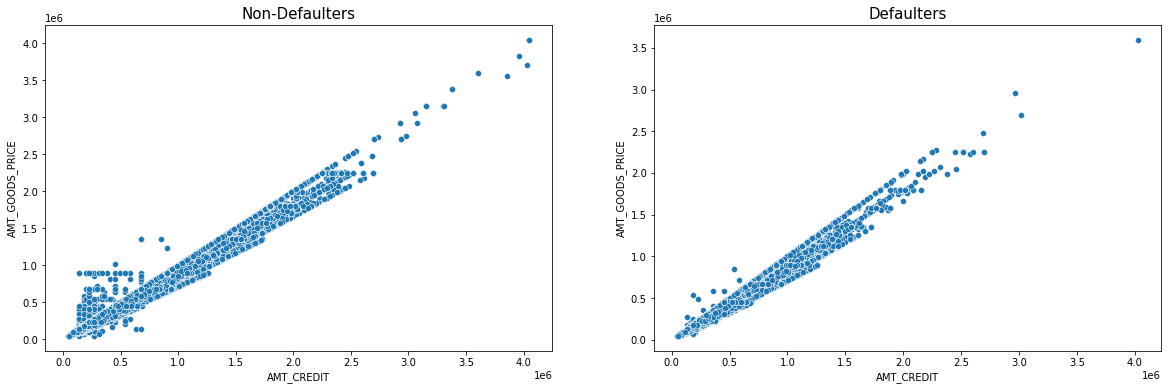

In [67]:
# Bivariate- Numeric-Numeric Analysis on AMT_CREDIT and AMT_GOODS_PRICE

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', data=df_0, ax=ax1)
ax1.set_xlabel('AMT_CREDIT')    
ax1.set_ylabel('AMT_GOODS_PRICE')
ax1.set_title('Non-Defaulters', fontsize=15)
    
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', data=df_1, ax=ax2)
ax2.set_xlabel('AMT_CREDIT')    
ax2.set_ylabel('AMT_GOODS_PRICE')
ax2.set_title('Defaulters', fontsize=15)
            
plt.show()



-  Both These plots are linearly scattered, we can here say that AMT_CREDIT will be required as per the AMT_GOODS_PRICE

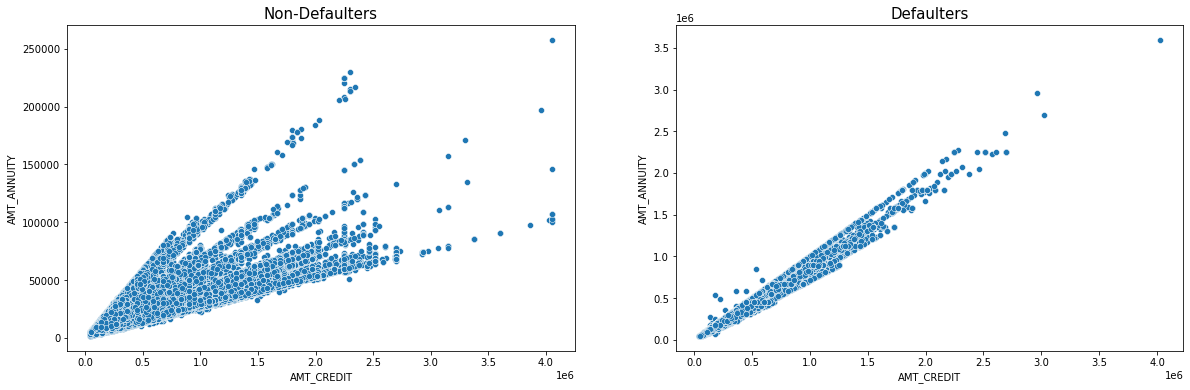

In [68]:
# Bivariate- Numeric-Numeric Analysis on AMT_CREDIT and AMT_ANNUITY

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.scatterplot('AMT_CREDIT', 'AMT_ANNUITY', data=df_0, ax=ax1)
ax1.set_xlabel('AMT_CREDIT')    
ax1.set_ylabel('AMT_ANNUITY')
ax1.set_title('Non-Defaulters', fontsize=15)
    
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', data=df_1, ax=ax2)
ax2.set_xlabel('AMT_CREDIT')    
ax2.set_ylabel('AMT_ANNUITY')
ax2.set_title('Defaulters', fontsize=15)
            
plt.show()

-  The trend is similar between defaulters and non defaulters

In [69]:
# let us now plot a Correlation matrix for 3 numeric variables AGE, AMT_CREDIT, AMT_INCOME_TOTAL

print('Corr_map for df_0\n', df_0[['AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']].corr())
print('\nCorr_map for df_1', df_1[['AGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']].corr())

Corr_map for df_0
                        AGE  AMT_CREDIT  AMT_INCOME_TOTAL
AGE               1.000000    0.047007         -0.062691
AMT_CREDIT        0.047007    1.000000          0.342572
AMT_INCOME_TOTAL -0.062691    0.342572          1.000000

Corr_map for df_1                        AGE  AMT_CREDIT  AMT_INCOME_TOTAL
AGE               1.000000    0.135111         -0.003162
AMT_CREDIT        0.135111    1.000000          0.038076
AMT_INCOME_TOTAL -0.003162    0.038076          1.000000


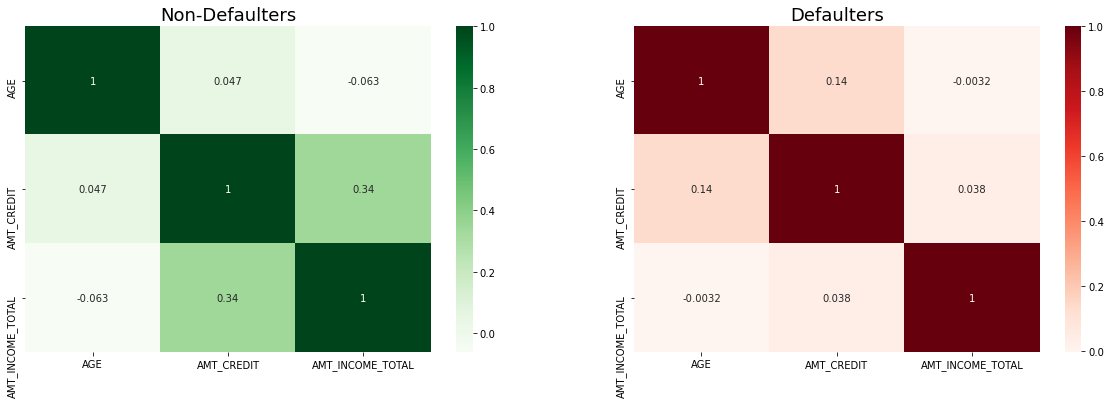

In [70]:
# Heatmap showing correlation matrix for AGE, AMT_CREDIT, AMT_INCOME_TOTAL

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(df_0[['AGE', 'AMT_CREDIT','AMT_INCOME_TOTAL']].corr(), annot=True, cmap='Greens', ax=ax1)
ax1.set_title('Non-Defaulters', fontsize=18)

sns.heatmap(df_1[['AGE', 'AMT_CREDIT','AMT_INCOME_TOTAL']].corr(), annot=True, cmap='Reds', ax=ax2)
ax2.set_title('Defaulters', fontsize=18)
plt.show()

- The Correlation between AGE, CREDIT amount and INCOME of an applicant is very low.
- Income of an individual is not directly dependant on his age


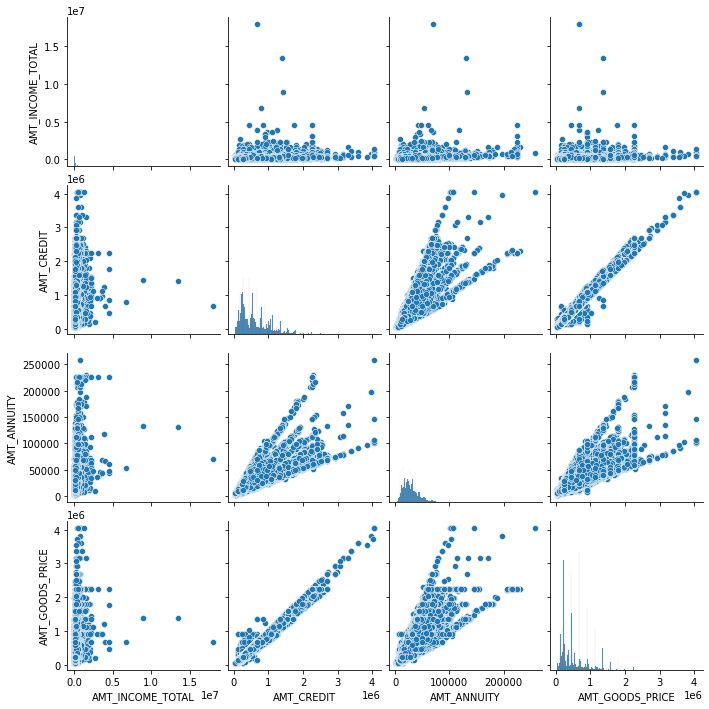

In [71]:
# Pair Plot between amount variables of df_0

sns.pairplot(data = df_0, vars=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

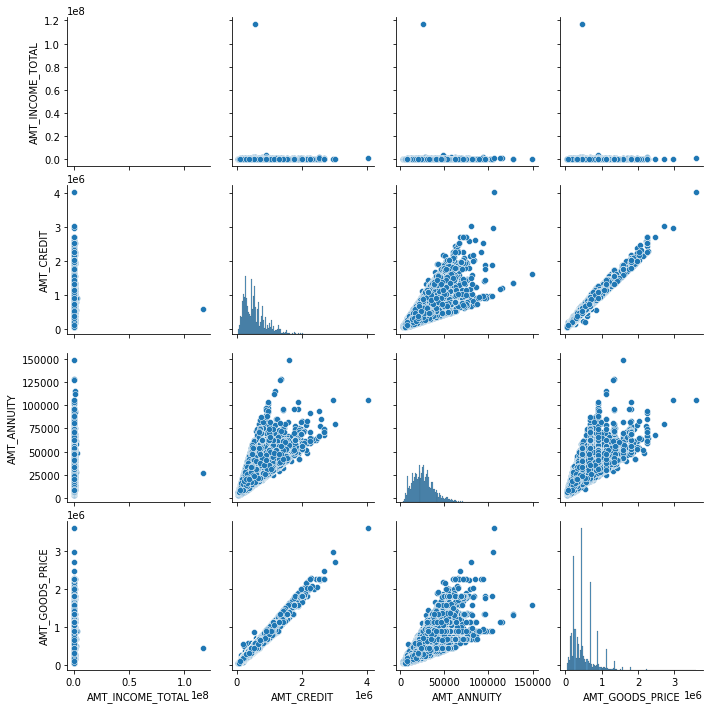

In [72]:
# Pair Plot between amount variables of df_1

sns.pairplot(data = df_1, vars=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

In [73]:
# ALl these variables are linearly scattered and seems to have high correlation

#### Bivariate: Numerical - Categorical Analysis

We will see some more analysis on Numerical-Categorical variables

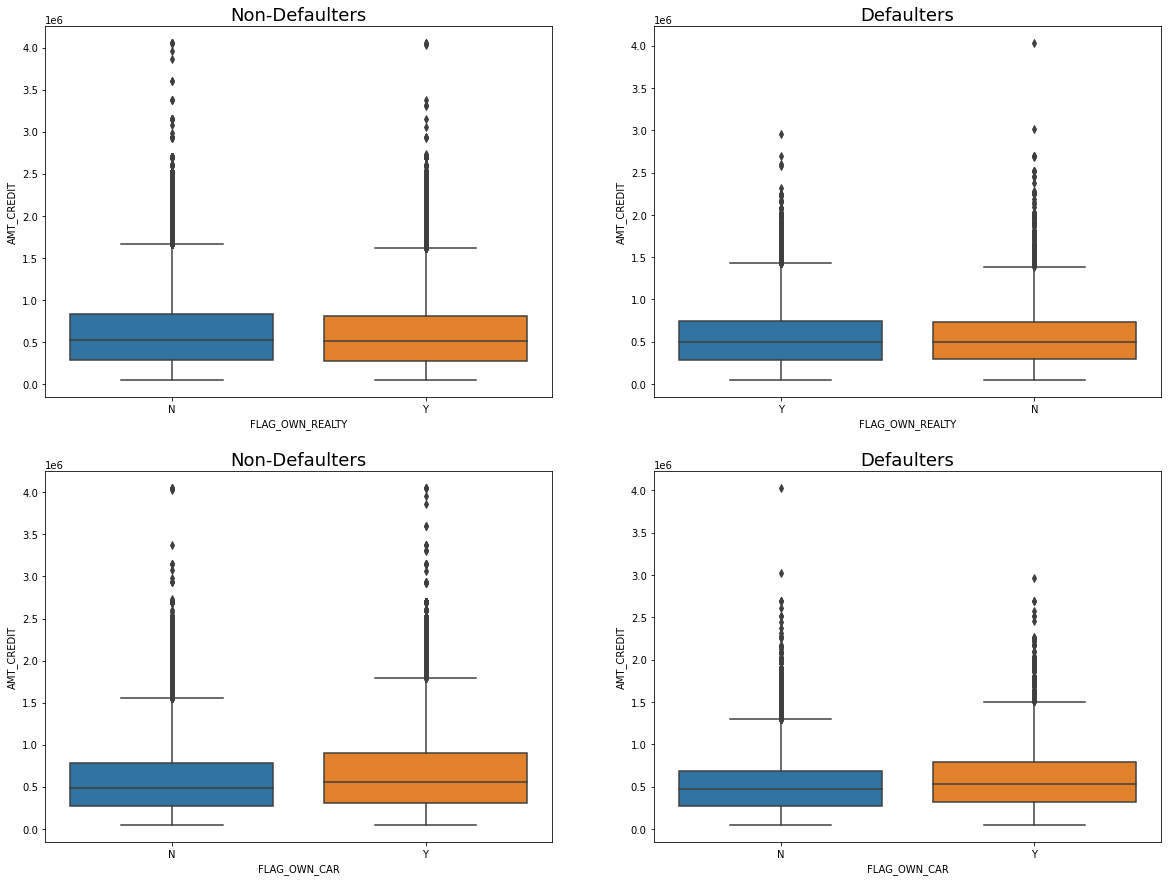

In [74]:
# Bivariate analysis on applicants who owns car and House with credit limits for their loans

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Non-Defaulters', fontsize=18)
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_CREDIT',data=df_0)


plt.subplot(2,2,2)
plt.title('Defaulters', fontsize=18)
sns.boxplot(x='FLAG_OWN_REALTY',y='AMT_CREDIT',data=df_1)

plt.subplot(2,2,3)
plt.title('Non-Defaulters',fontsize=18 )
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_CREDIT',data=df_0)


plt.subplot(2,2,4)
plt.title('Defaulters', fontsize=18)
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_CREDIT',data=df_1)

plt.show()

We can say here that owning a car and a Property does not define who defaults and who doesn't.

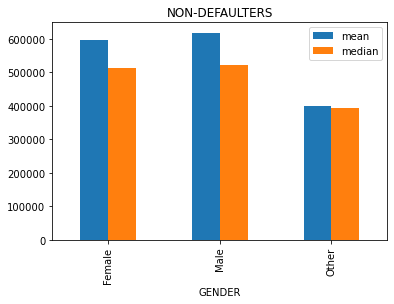

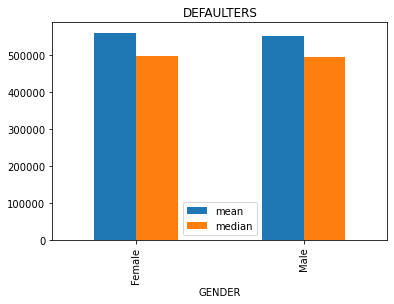

In [75]:
# GENDER VS AMT_CREDIT

df_0.groupby('GENDER')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'NON-DEFAULTERS')

df_1.groupby('GENDER')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'DEFAULTERS')
plt.show()

-  Here we can see that AMT_CREDIT is similar to Male and Female both. and that gender does not show any specific cause of defaults

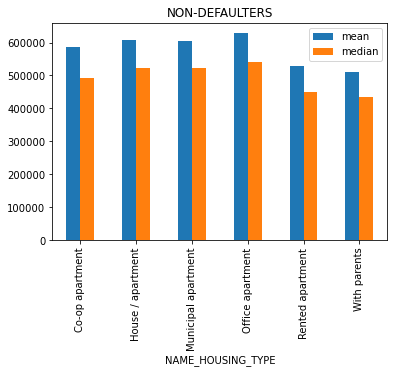

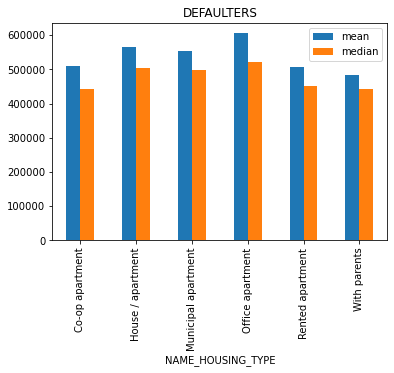

In [76]:
# NAME_HOUSING_TYPE VS AMT_CREDIT

df_0.groupby('NAME_HOUSING_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'NON-DEFAULTERS')

df_1.groupby('NAME_HOUSING_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'DEFAULTERS')
plt.show()

-  Here we can see that higher credit amount is given to ppl having office apartment. also highest number of defaulters are from office apartments.


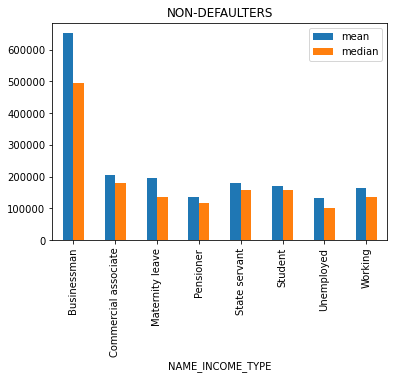

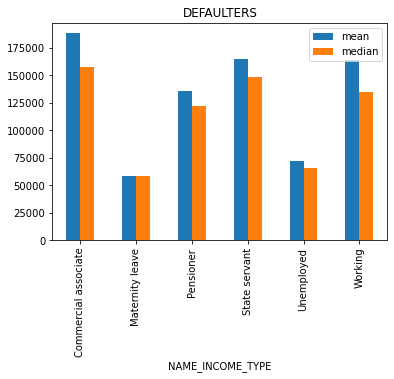

In [77]:
# NAME_INCOME_TYPE vs AMT_INCOME_TOTAL

df_0.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar(title = 'NON-DEFAULTERS')

df_1.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar(title = 'DEFAULTERS')
plt.show()

-  It is clear from here that Commercial associates are more likely to be defaulters

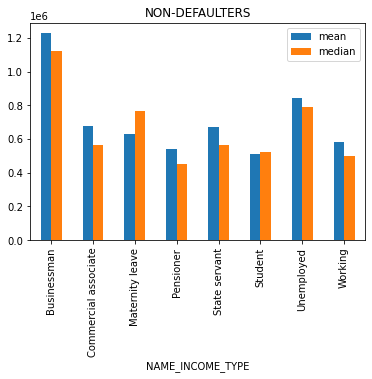

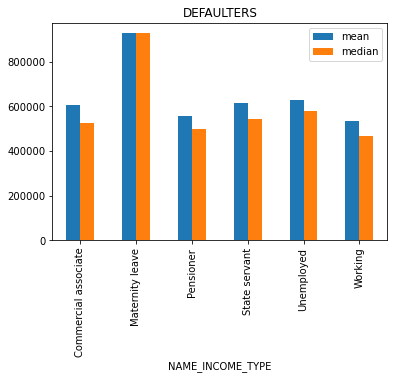

In [78]:
# NAME_INCOME_TYPE vs AMT_CREDIT

df_0.groupby('NAME_INCOME_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'NON-DEFAULTERS')

df_1.groupby('NAME_INCOME_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'DEFAULTERS')
plt.show()

- It is clear from here that the people on maternity leave are more likely defaulters. probably because they have less income

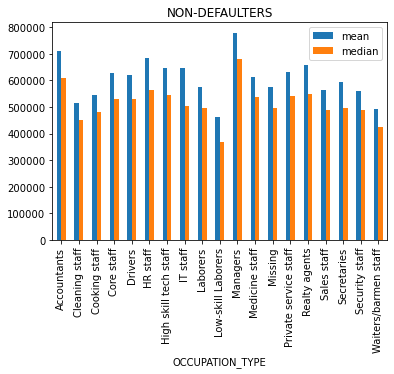

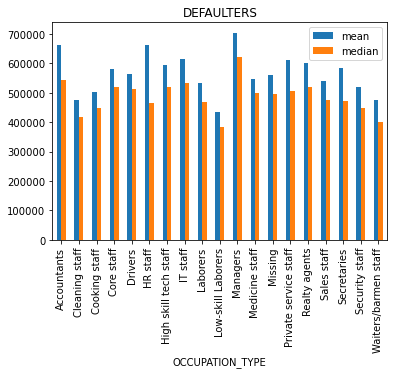

In [79]:
#OCCUPATION_TYPE

df_0.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'NON-DEFAULTERS')
plt.show()
df_1.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar(title = 'DEFAULTERS')
plt.show()

-  WE can infer from this that Occupation type does not tell anything about defaulters. The Trend is similar for both defaulters and non defaulters

#### Bivariate - Categorical - Categorical Analysis

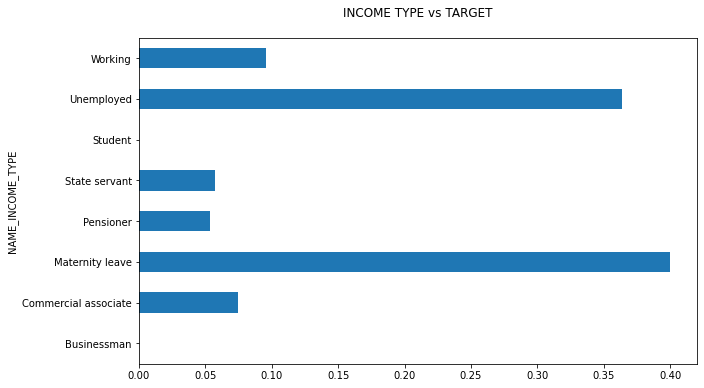

In [80]:
# NAME_INCOME_TYPE vs TARGET

plt.figure(figsize=[10,6])
applications.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh(title='INCOME TYPE vs TARGET\n')
plt.show()

- This clearly shows that People on maternity leave and Umemployed are the most threat
- Working, State servants, pensioners, commercial associates comes next inline to default

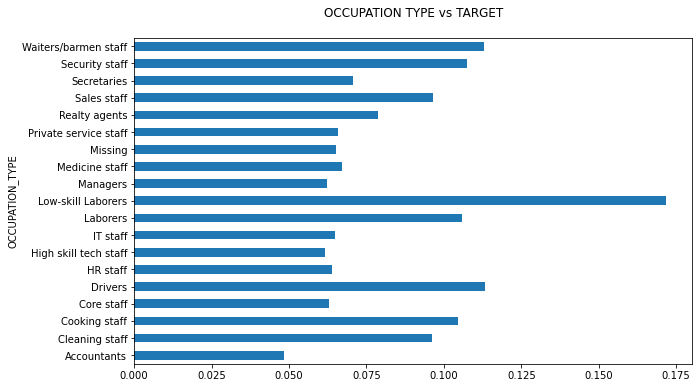

In [81]:
# OCCUPATION_TYPE vs TARGET 

plt.figure(figsize=[10,6])
applications.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.barh(title='OCCUPATION TYPE vs TARGET\n')
plt.show()

- Low skill labourers are more likely to default
- Drivers, Labourers, cleaning staff, cooking staff, waiters, security staff - These are the categories who have very less income and that might be the reason that they are more likely to default

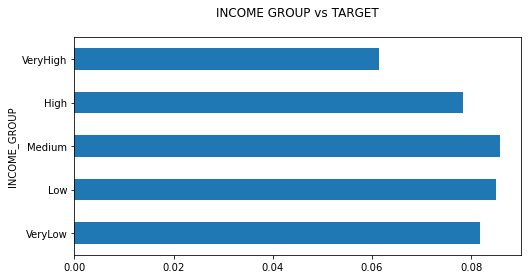

In [82]:
# INCOME_GROUP vs TARGET

plt.figure(figsize=[8,4])
applications.groupby(['INCOME_GROUP'])['TARGET'].mean().plot.barh(title = 'INCOME GROUP vs TARGET\n')
plt.show()

- People with low or Medium salaries tend to default most
- People with very high salaries are less likely to default

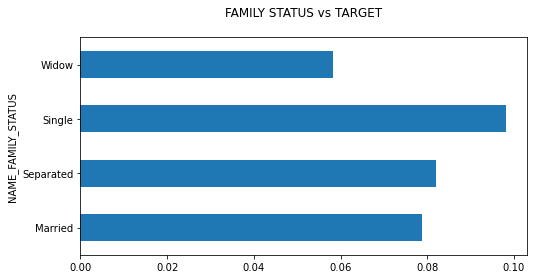

In [83]:
# NAME_FAMILY_STATUS vs TARGET
plt.figure(figsize=[8,4])
applications.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.barh(title= 'FAMILY STATUS vs TARGET\n')
plt.show()

- both Single and separated People are more likely to default

#### Multivariate Analysis

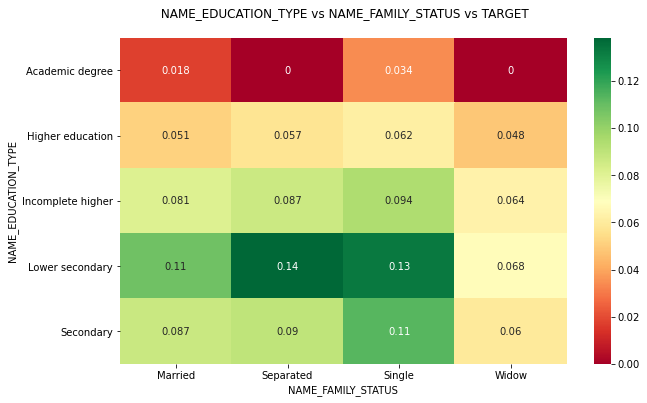

In [84]:
# NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET

plt.figure(figsize=([10,6]))
res=pd.pivot_table(data=applications, index='NAME_EDUCATION_TYPE', columns = 'NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.title(' NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS vs TARGET\n', fontsize=12)
plt.show()


- Now it is perfectly clear that folks with lower secondary education and who are single and/or separated are more likely to be defaulters
- Folks with secondary education and single are also more likely to be defaulters
- Folks having Academic degree are having very very less chance of defaulting

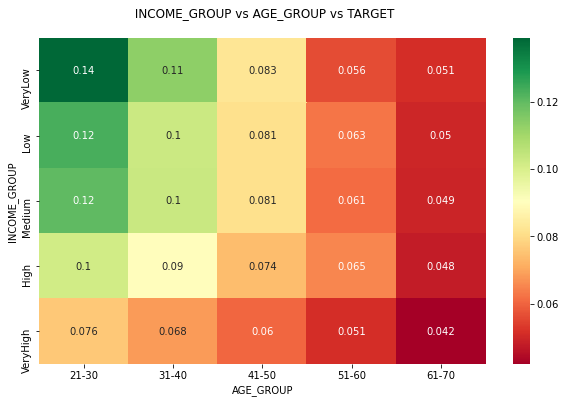

In [85]:
# INCOME_GROUP vs AGE_GROUP vs TARGET

plt.figure(figsize=([10,6]))
res=pd.pivot_table(data=applications, index='INCOME_GROUP', columns = 'AGE_GROUP', values='TARGET')
plt.title(' INCOME_GROUP vs AGE_GROUP vs TARGET\n', fontsize=12)
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

- It is evident from here that people having low income and who are young (age between 21-30) are more likely to be defaulters
- folks with very low income but having age between 31-40 are also most likely to be defaulters

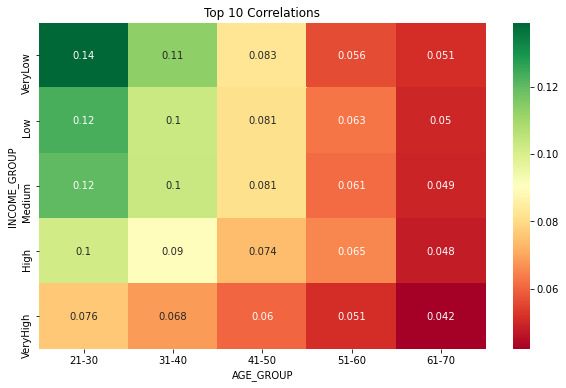

In [86]:
plt.figure(figsize=([10,6]))
res=pd.pivot_table(data=applications, index='INCOME_GROUP', columns = 'AGE_GROUP', values='TARGET')
plt.title('Top 10 Correlations', fontsize=12)
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

In [87]:
####### END of Dataset-1 ########

### Dataset-2 - 'previous_application' 

Let us now look at our 2nd dataset - previous_application and try to infer some insights from this data.

### Step-1: Data Sourcing

In [88]:
# Reading the dataset 'application_data'

prev_app = pd.read_csv('previous_application.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [89]:
prev_app.shape

(1670214, 37)

In [90]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Step-2 Data Cleaning

In [92]:
#checking percentage of null values
prev_app.isnull().mean().round(4) * 100

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### Handling Missing Values

In [93]:
# checking for columns having null values > 40% 
nv_above40 = (prev_app.isnull().mean().round(4) * 100) >=40
nv_above40.value_counts()

False    26
True     11
dtype: int64

In [94]:
# dropping columns with null values > 40%

drop_col = prev_app.columns[nv_above40].tolist()
prev_app.drop(drop_col, axis=1, inplace=True)


In [95]:
# Checking columns with missing values below 10%. we can remove them as these are neglible values.

nv_below10 = ((prev_app.isnull().mean()*100) >0) & ((prev_app.isnull().mean()*100) <10)
prev_app.columns[nv_below10].tolist()

['AMT_CREDIT', 'PRODUCT_COMBINATION']

In [96]:
# removing rows having missing % neglible

prev_app=prev_app[~prev_app.PRODUCT_COMBINATION.isnull()]
prev_app=prev_app[~prev_app.AMT_CREDIT.isnull()]

In [97]:
# Rechecking the shape of dataset

prev_app.shape

(1669867, 26)

In [98]:
nv_above10 = (prev_app.isnull().mean()*100) >10
prev_app.columns[nv_above10].tolist()

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

In [99]:
# Let us now review these columns one by one.
# AMT_ANNUITY
data1 = prev_app[prev_app.AMT_ANNUITY.isnull()]
data1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [100]:
# reviewing the data1 based on the contract status
data1.NAME_CONTRACT_STATUS.value_counts(normalize=True)


Canceled        0.821455
Refused         0.109890
Unused offer    0.068633
Approved        0.000022
Name: NAME_CONTRACT_STATUS, dtype: float64

Here we can see that almost all the null values have status cancelled, or refused or unused offer. only a handful of items have status approved. This is a very neglible value and will not affect any of our analysis. Imputing these columns with mean or median might affect our analysis as these are critical parameters. So we will just impute these as 0 and leave it as is.

In [101]:
# Imputing null values in AMT_ANNUITY with 0 values
prev_app.AMT_ANNUITY.fillna(0,inplace = True)

In [102]:
# AMT_GOODS_PRICE
data2 = prev_app[prev_app.AMT_GOODS_PRICE.isnull()]
data2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,0.0,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,0.0,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,0.0,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,0.0,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,0.0,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [103]:
# reviewing the data1 based on the contract status
data2.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Canceled        0.792524
Approved        0.111209
Refused         0.096254
Unused offer    0.000013
Name: NAME_CONTRACT_STATUS, dtype: float64

There are a bunch of rows with Contract Status as Approved in this category. However, these still are not very high, just 11%, and majority of the data i.e., around 80% are cancelled. So we may as well impute these values with 0 instead of median values as these might affect our analysis as these are critical parameter

In [104]:
# Imputing null values in AMT_GOODS_PRICE with 0 values
prev_app.AMT_GOODS_PRICE.fillna(0,inplace = True)

In [105]:
# CNT_PAYMENT

data3= prev_app[prev_app.CNT_PAYMENT.isnull()]
data3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,0.0,0.0,0.0,0.0,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,0.0,0.0,0.0,0.0,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,0.0,0.0,0.0,0.0,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,0.0,0.0,0.0,0.0,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,0.0,0.0,0.0,0.0,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [106]:
# reviewing the data1 based on the contract status
data3.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Canceled        0.821466
Refused         0.109889
Unused offer    0.068634
Approved        0.000011
Name: NAME_CONTRACT_STATUS, dtype: float64

Here we can see that almost all the null values have status cancelled, or refused or unused offer. only a handful of items have status approved. This is a very neglible value and will not affect any of our analysis. Imputing these columns with mean or median might affect our analysis as these are critical parameters. So we will just impute these as 0 and leave it as is.

In [107]:
# Imputing null values in CNT_PAYMENT with 0 values
prev_app.CNT_PAYMENT.fillna(0,inplace = True)

In [108]:
# Let us recheck for null values again in the complete dataset
prev_app.isnull().mean().round(4) * 100

# No null values present.

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

#### Handling Outliers

In [109]:
# let us now start with the process of checking outliers in this dataset. 
prev_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

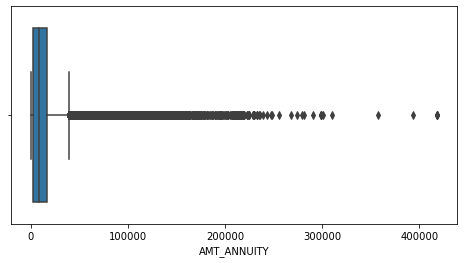

In [110]:
# Checking outliers on AMT_ANNUITY
plt.figure(figsize=[8,4])
sns.boxplot(prev_app.AMT_ANNUITY)
plt.show()

In [111]:
# Let us check the quantiles
prev_app['AMT_ANNUITY'].quantile([0, 0.4, 0.6,0.8, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we will not remove the outliers as this may affect our analysis.

0.0         0.000
0.4      5910.696
0.6     10952.730
0.8     20250.000
0.9     30225.969
1.0    418058.145
Name: AMT_ANNUITY, dtype: float64

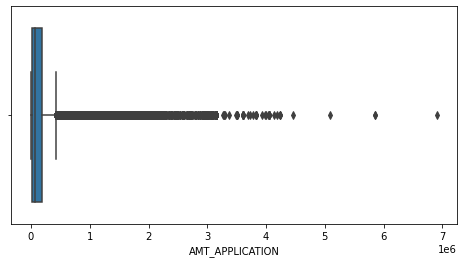

In [112]:
# Checking outliers on AMT_APPLICATION
plt.figure(figsize=[8,4])
sns.boxplot(prev_app.AMT_APPLICATION)
plt.show()

# This is continous variable with outliers. No missing values here. so let us keep this as is for now.

In [113]:
prev_app['AMT_APPLICATION'].quantile([0, 0.4, 0.6,0.8, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we will not remove the outliers as this may affect our analysis.

0.0          0.00
0.4      45000.00
0.6     103848.93
0.8     229050.00
0.9     450000.00
1.0    6905160.00
Name: AMT_APPLICATION, dtype: float64

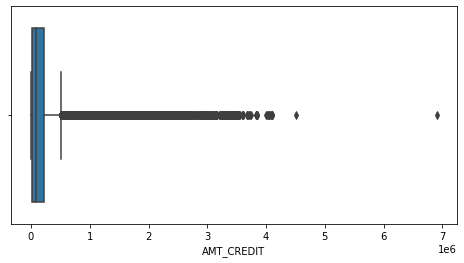

In [114]:
# Checking outliers on AMT_CREDIT

plt.figure(figsize=[8,4])
sns.boxplot(prev_app.AMT_CREDIT)
plt.show()

In [115]:
prev_app['AMT_CREDIT'].quantile([0, 0.4, 0.6,0.8, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we will not remove the outliers as this may affect our analysis.

0.0          0.0
0.4      51952.5
0.6     116059.5
0.8     270000.0
0.9     533160.0
1.0    6905160.0
Name: AMT_CREDIT, dtype: float64

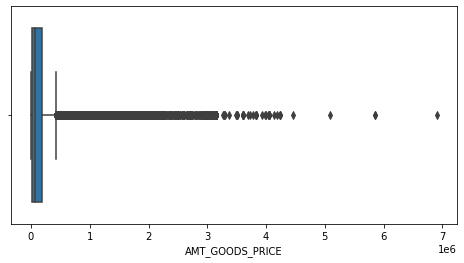

In [116]:
# Checking outliers on AMT_GOODS_PRICE

plt.figure(figsize=[8,4])
sns.boxplot(prev_app.AMT_GOODS_PRICE)
plt.show()

In [117]:
prev_app['AMT_GOODS_PRICE'].quantile([0, 0.4, 0.6,0.8, 0.9,1])

# The difference between the 90th percentile and max value is too high. Also this is a continoous variable so we will not remove the outliers as this may affect our analysis.

0.0          0.0
0.4      45000.0
0.6     103855.5
0.8     229257.0
0.9     450000.0
1.0    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

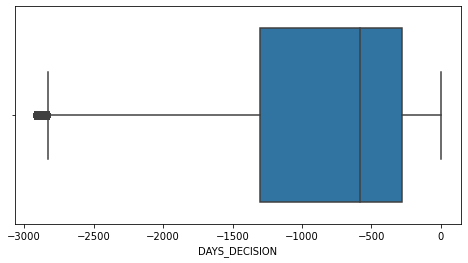

In [118]:
# Checking outliers on DAYS_DECISION

plt.figure(figsize=[8,4])
sns.boxplot(prev_app.DAYS_DECISION)
plt.show()

In [119]:
# DAYS_DECISION seems to be in negative. let us convert them into positive

prev_app['DAYS_DECISION'] = prev_app['DAYS_DECISION'].abs()

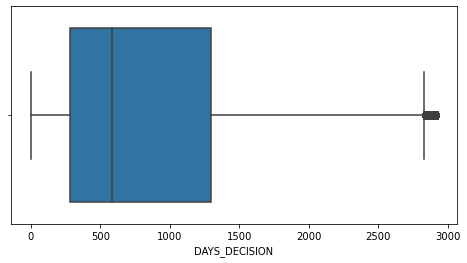

In [120]:
# Replotting the boxplot
plt.figure(figsize=[8,4])
sns.boxplot(prev_app.DAYS_DECISION)
plt.show()

# There seems to be a bit of outliers. But these are continous so we can just leave them as is.

In [121]:
prev_app['DAYS_DECISION'].quantile([0, 0.4, 0.6,0.8, 0.9,1])

0.0       1.0
0.4     430.0
0.6     789.0
0.8    1555.0
0.9    2250.0
1.0    2922.0
Name: DAYS_DECISION, dtype: float64

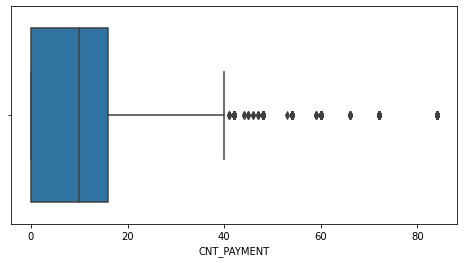

In [122]:
# Checking outliers on CNT_PAYMENT

plt.figure(figsize=[8,4])
sns.boxplot(prev_app.CNT_PAYMENT)
plt.show()


In [123]:
prev_app['CNT_PAYMENT'].quantile([0, 0.4, 0.6,0.8, 0.9,1])

0.0     0.0
0.4     6.0
0.6    12.0
0.8    24.0
0.9    36.0
1.0    84.0
Name: CNT_PAYMENT, dtype: float64

### Step-3: Analysis

Now let us start analysing the data and mark our observations

In [124]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1669867 non-null  int64  
 1   SK_ID_CURR                   1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669867 non-null  object 
 3   AMT_ANNUITY                  1669867 non-null  float64
 4   AMT_APPLICATION              1669867 non-null  float64
 5   AMT_CREDIT                   1669867 non-null  float64
 6   AMT_GOODS_PRICE              1669867 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1669867 non-null  object 
 12  NAME_CONTRACT_STATUS         1669867 non-n

#### Univariate Analysis - Categorical

In [125]:
prev_app.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high


In [126]:
# NAME_CONTRACT_TYPE
round(prev_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100)

Cash loans         45.0
Consumer loans     44.0
Revolving loans    12.0
Name: NAME_CONTRACT_TYPE, dtype: float64

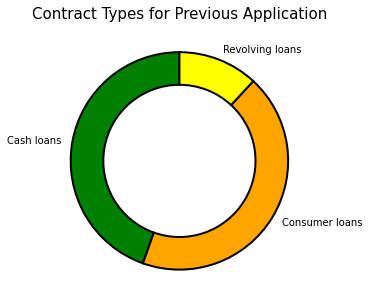

In [127]:
#Doughnut plot for NAME_CONTRACT_TYPE 

wedgeprops = {'width':0.3 , 'edgecolor':'black', 'linewidth':2}
labels = ['Cash loans','Consumer loans','Revolving loans']
plt.figure(figsize=(10,5))

plt.title('Contract Types for Previous Application', fontsize=15, loc='center')
plt.pie([45,44, 12], wedgeprops=wedgeprops, startangle=90, labels = labels, colors=['green', 'orange', 'yellow'])
plt.show()

In [128]:
# NAME_CASH_LOAN_PURPOSE
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts()


XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

XAP and XNA values are very high, the plot isnt making sense. These seems like some unknown category. not sure what these are. So, treating these values as unknown and proceeding with analysis for rest of the category


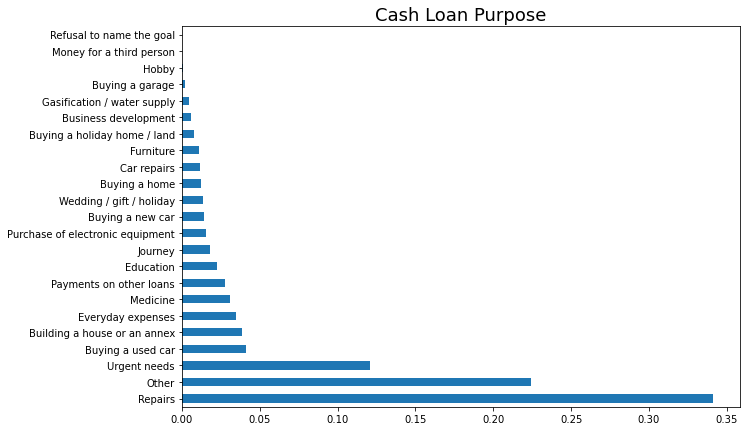

In [129]:
# Plotting a chart for NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(10,7))
prev_app[(prev_app.NAME_CASH_LOAN_PURPOSE != 'XNA') & (prev_app.NAME_CASH_LOAN_PURPOSE != 'XAP')]['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True).plot.barh()
plt.title('Cash Loan Purpose', fontsize=18, loc='center')
plt.show()

Once the XAP and XNA categories are removed, we can now clearly see the cash loan purpose of the users
- cash Loans required for mostly for repairs and other (some clearly not specified reason)
- Cash loans are often taken for Urgent Needs and buying car or house etc

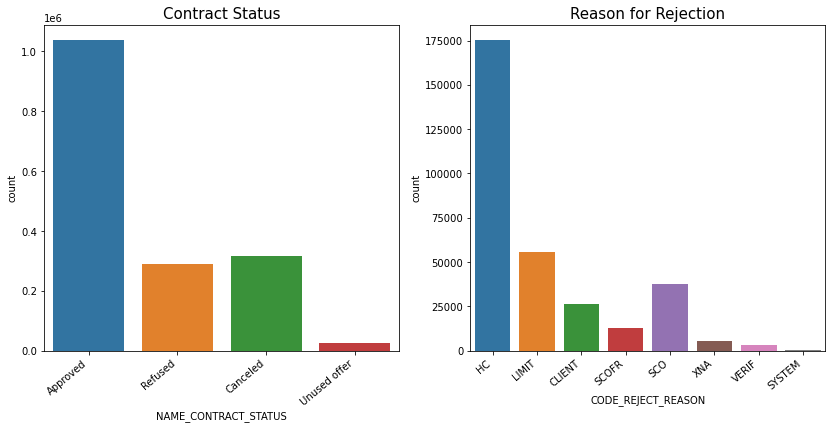

In [130]:
# NAME_CONTRACT_STATUS and CODE_REJECT_REASON

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))  
sns.countplot(x='NAME_CONTRACT_STATUS', data=prev_app, ax=ax1)
ax1.set_title('Contract Status',fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

sns.countplot(x=(prev_app[prev_app.CODE_REJECT_REASON != 'XAP']['CODE_REJECT_REASON']), data=prev_app, ax=ax2)
ax2.set_title('Reason for Rejection',fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()

# Reason for rejection graph plotted removed XAP values to get better insights

With these two plots we can infer 
- Most of the applications were approved. 
- The applications that were refused / rejected might be because of High credits and limits

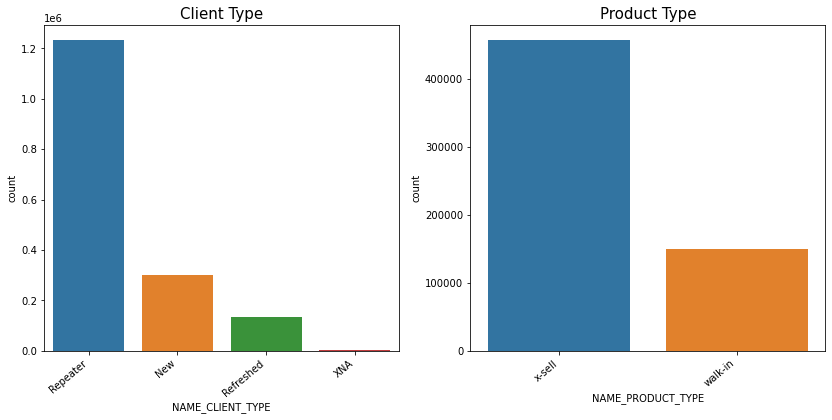

In [131]:
# NAME_CLIENT_TYPE and NAME_PRODUCT_TYPE

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))  
sns.countplot(x='NAME_CLIENT_TYPE', data=prev_app, ax=ax1)
ax1.set_title('Client Type',fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

sns.countplot(x=(prev_app[prev_app.NAME_PRODUCT_TYPE != 'XNA']['NAME_PRODUCT_TYPE']), data=prev_app, ax=ax2)
ax2.set_title('Product Type',fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()


Looking at these graphs, we can say that 
- most of the applicants are repeaters and few are new clients
- The Product types are mostly x-sell

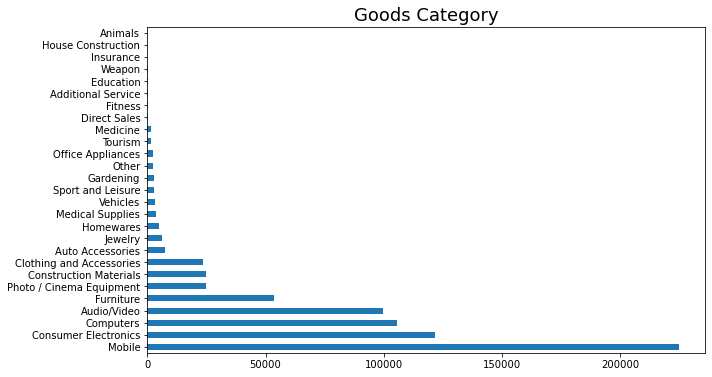

In [132]:
#NAME_GOODS_CATEGORY

plt.figure(figsize=(10,6))

prev_app[prev_app.NAME_GOODS_CATEGORY != 'XNA']['NAME_GOODS_CATEGORY'].value_counts().plot.barh()
plt.title('Goods Category', fontsize=18, loc='center')
plt.show()

# Graph plotted removing XNA values to get better insights

XNA values was clouding our view, so just excluded them from this graph to get better insights
- we can see clearly now that most of the loans are for Mobiles and Electronic items like consumer electronics, computers, audio/video
- A lot of them are also for Furnitures etc

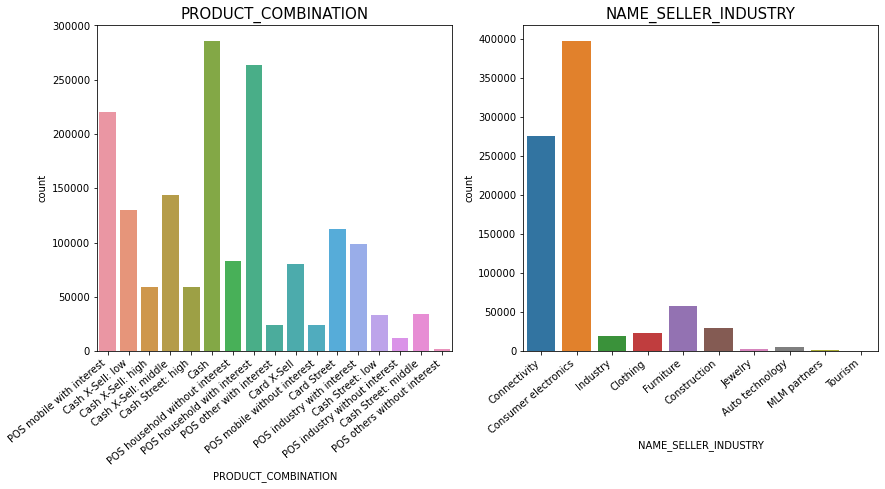

In [133]:
# NAME_SELLER_INDUSTRY and PRODUCT_COMBINATION

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))  
sns.countplot(x='PRODUCT_COMBINATION', data=prev_app, ax=ax1)
ax1.set_title('PRODUCT_COMBINATION',fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

sns.countplot(x=(prev_app[prev_app.NAME_SELLER_INDUSTRY != 'XNA']['NAME_SELLER_INDUSTRY']), data=prev_app, ax=ax2)
ax2.set_title('NAME_SELLER_INDUSTRY',fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()

# Graph plotted for NAME_SELLER_INDUSTRY is removing XNA values to get better insights

XNA values was clouding our view, so just excluded them from this graph to get better insights
- we can see clearly now that most of the loans are for consumer electronics and connectivity
- Cash loans are preferred more

#### Univariate - Numerical

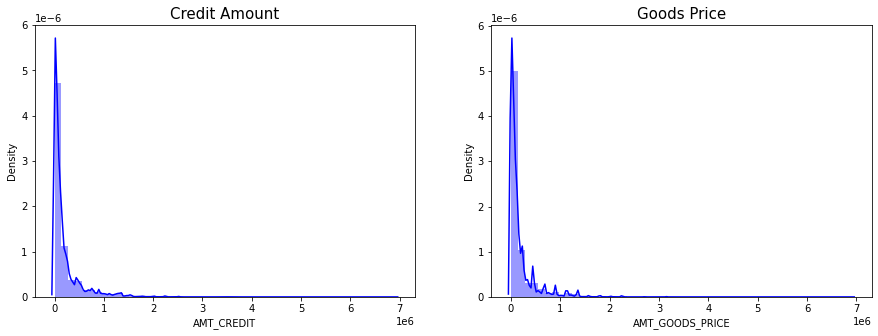

In [134]:
# AMT_CREDIT & AMT_GOODS_PRICE

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
 
sns.distplot(prev_app['AMT_CREDIT'], color='blue', ax=ax1)
ax1.set_title('Credit Amount',fontsize=15)
sns.distplot(prev_app['AMT_GOODS_PRICE'], color='blue', ax=ax2)
ax2.set_title('Goods Price',fontsize=15)

plt.show()

We can say from here that the Credit Amount and the Goods Price have similar trend. Which makes sense. As credit Amount depends on the Price of the goods.

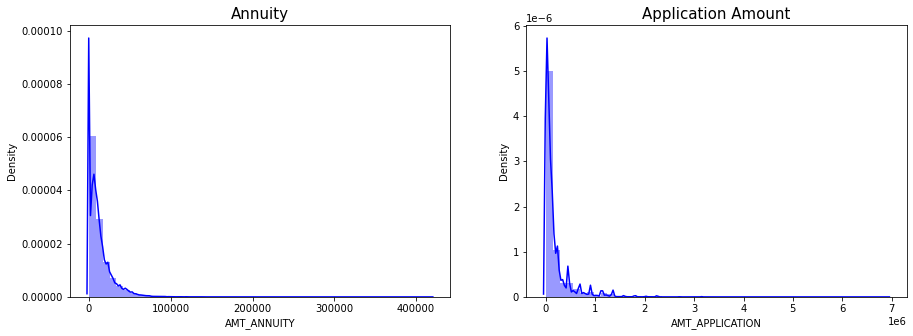

In [135]:
# AMT_ANNUITY & AMT_APPLICATION

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
 
sns.distplot(prev_app['AMT_ANNUITY'], color='blue', ax=ax1)
ax1.set_title('Annuity',fontsize=15)

sns.distplot(prev_app['AMT_APPLICATION'], color='blue', ax=ax2)
ax2.set_title('Application Amount',fontsize=15)

plt.show()

-  AMT_APPLICATION shows the amount of credit asked by clients in previous applications. 
-  AMT_ANNUITY shows the Annuity of previous application
-  Both plots seems to have similar Trend

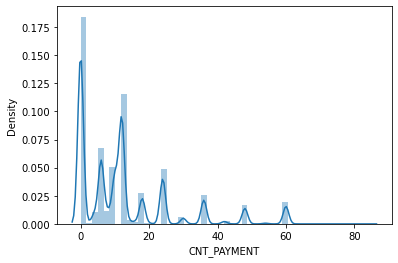

In [136]:
# CNT_PAYMENT

plt.subplots(figsize=(6,4))
sns.distplot(prev_app['CNT_PAYMENT'])
plt.show()

CNT_PAYMENT shows Term of previous credit at application of the previous application
This shows that most of the clients have term of between 0-20

#### Bi-Variate Analysis - Numeric to Numeric

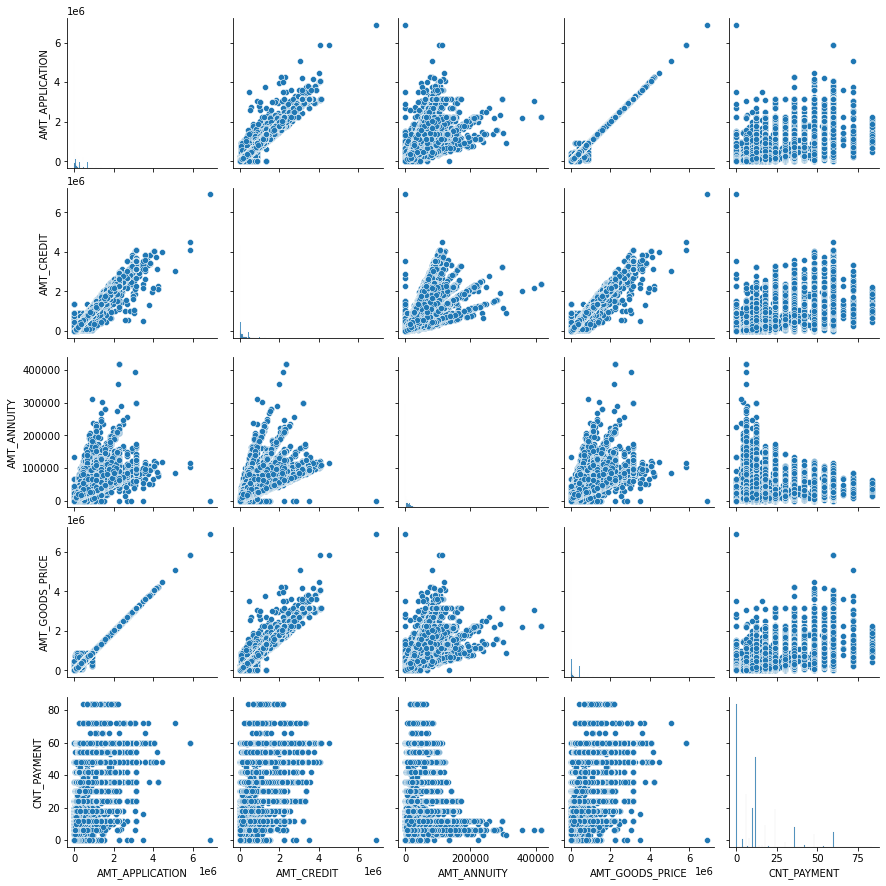

In [137]:
# Let us plot a pair plot for Numeric variables

sns.pairplot(data = prev_app, vars=['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'])
plt.show()

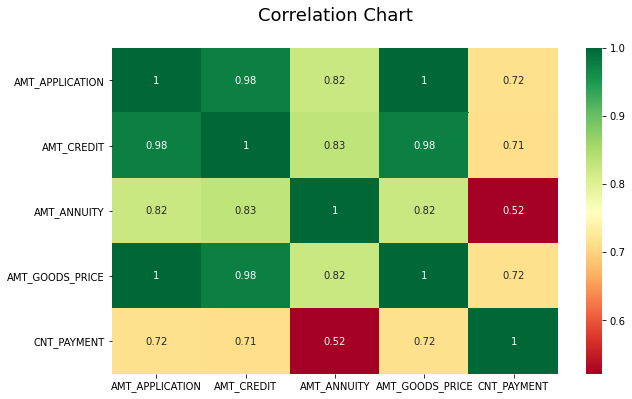

In [138]:
# Let us see the correlation on these numeric variables clearly

fig,(ax) = plt.subplots(figsize=(10,6))
sns.heatmap(prev_app[['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].corr(), annot=True, cmap='RdYlGn')
ax.set_title('Correlation Chart\n', fontsize=18)
plt.show()

We can see the strong correlation between all of these parameters. All these variables are interlinked.
- Most of the clients received the credit amount as per they requested in the application
- Credit amount depends on the goods price
- Credit amount also depends on Term of previous credit

#### Bi-Variate Analysis - Numerical to Categorical

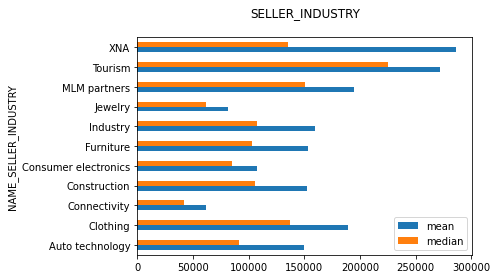

In [139]:
# As we saw that correlation for all above numeric variables is strong, we will consider only AMT_CREDIT with categorical variables
# NAME_SELLER_INDUSTRY and AMT_CREDIT

prev_app.groupby('NAME_SELLER_INDUSTRY')['AMT_CREDIT'].aggregate(['mean','median']).plot.barh(title = 'SELLER_INDUSTRY\n')
plt.show()

When we look at the average amounts, we can say that
- Credit Amount is more for Tourism and MLM Partners
- Next inline are Sellers from clothing, Industry, Construction and Furniture etc

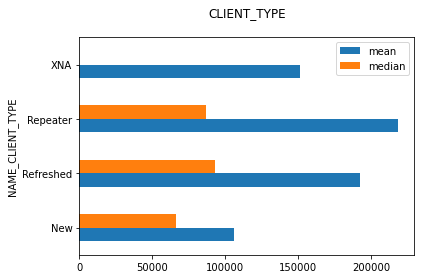

In [140]:
# NAME_CLIENT_TYPE and AMT_CREDIT

prev_app.groupby('NAME_CLIENT_TYPE')['AMT_CREDIT'].aggregate(['mean','median']).plot.barh(title = 'CLIENT_TYPE\n')
plt.show()

- Repeaters are asking for higher credit amount than new applicants

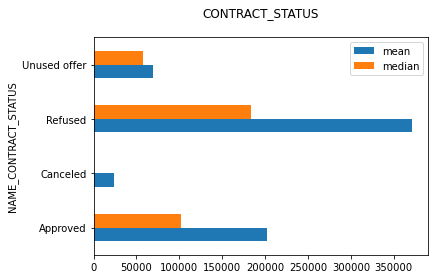

In [141]:
# NAME_CONTRACT_STATUS and AMT_CREDIT

prev_app.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT'].aggregate(['mean','median']).plot.barh(title = 'CONTRACT_STATUS\n')
plt.show()

- Reason for rejecting the loan is mostly because of high credit amount requirements

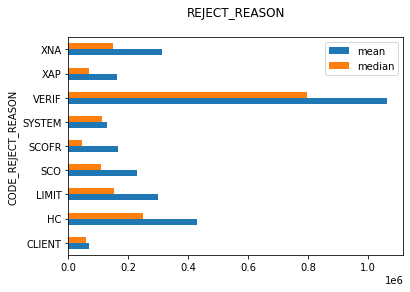

In [142]:
# CODE_REJECT_REASON and AMT_CREDIT

prev_app.groupby('CODE_REJECT_REASON')['AMT_CREDIT'].aggregate(['mean','median']).plot.barh(title = 'REJECT_REASON\n')
plt.show()

- Loans that are rejected are mostly during the verification process
- A certain amount of loans are rejected because of high credit

#### Bi-Variate Analysis - Categorical to Categorical

In [143]:
# create CONTRACT_STATUS_flag of numerical data type where CONTRACT_STATUS "Approved"= 1, "Canceled,Refused,Unused offer"= 0

prev_app['CONTRACT_STATUS_FLAG'] = np.where(prev_app.NAME_CONTRACT_STATUS =='Approved',1,0)

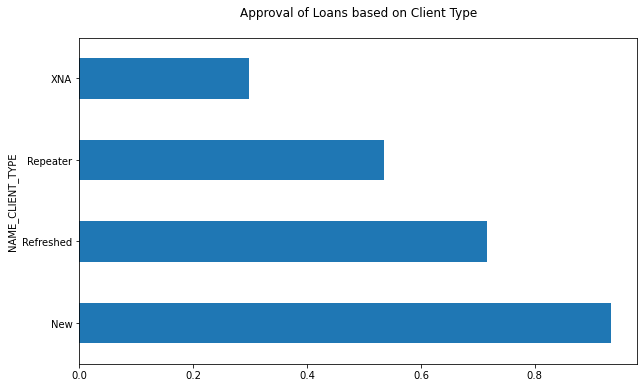

In [144]:
# NAME_CLIENT_TYPE vs CONTRACT_STATUS_FLAG

plt.figure(figsize=[10,6])
prev_app.groupby([prev_app.NAME_CLIENT_TYPE])['CONTRACT_STATUS_FLAG'].mean().plot.barh(title = 'Approval of Loans based on Client Type\n')
plt.show()

- Approved loans are mostly with new and refreshed clients
- A certain amount of repeaters also gets loan approved.

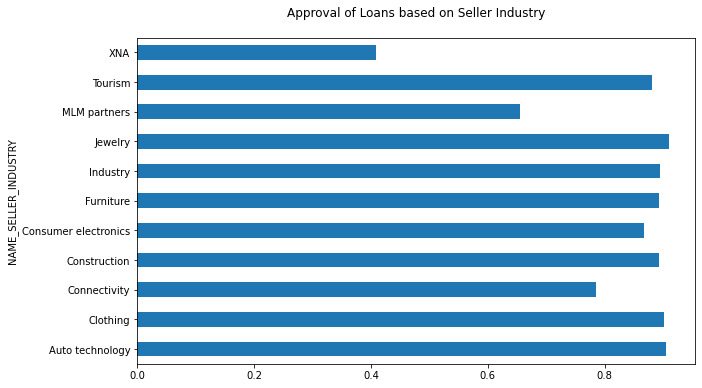

In [145]:
# NAME_SELLER_INDUSTRY vs CONTRACT_STATUS_FLAG

plt.figure(figsize=[10,6])
prev_app.groupby([prev_app.NAME_SELLER_INDUSTRY])['CONTRACT_STATUS_FLAG'].mean().plot.barh(title ='Approval of Loans based on Seller Industry\n')
plt.show()

- Loan approval not dependant on any particular industry.
- Almost all types of folks get loans approved
- MLM partners have a little less likely chance of getting loan approvals

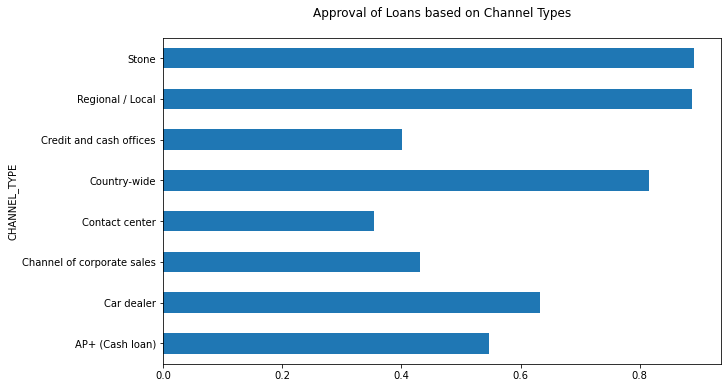

In [146]:
# CHANNEL_TYPE vs CONTRACT_STATUS_FLAG

plt.figure(figsize=[10,6])
prev_app.groupby([prev_app.CHANNEL_TYPE])['CONTRACT_STATUS_FLAG'].mean().plot.barh(title ='Approval of Loans based on Channel Types\n')
plt.show()

- Maximum number of loans approved for Stone, Regional/Local Channel Types
- Next inline are Country-Wide Channel Types

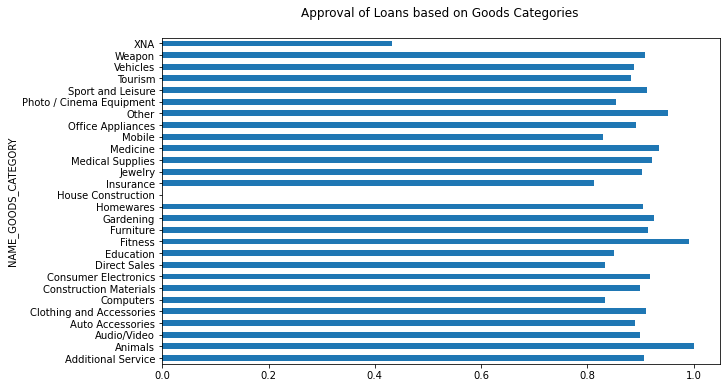

In [147]:
# NAME_GOODS_CATEGORY vs CONTRACT_STATUS_FLAG

plt.figure(figsize=[10,6])
prev_app.groupby([prev_app.NAME_GOODS_CATEGORY])['CONTRACT_STATUS_FLAG'].mean().plot.barh(title ='Approval of Loans based on Goods Categories \n')
plt.show()

- Maximum number of loans approved are for Animals - might be for farming purpose
- 2nd most type of approved loans if for fitness - look like a lot of people invest money on health (which is a good thing)
- rest of the categories are fairly spread across

In [148]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1669867 non-null  int64  
 1   SK_ID_CURR                   1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669867 non-null  object 
 3   AMT_ANNUITY                  1669867 non-null  float64
 4   AMT_APPLICATION              1669867 non-null  float64
 5   AMT_CREDIT                   1669867 non-null  float64
 6   AMT_GOODS_PRICE              1669867 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1669867 non-null  object 
 12  NAME_CONTRACT_STATUS         1669867 non-n

#### Multivariate Analysis

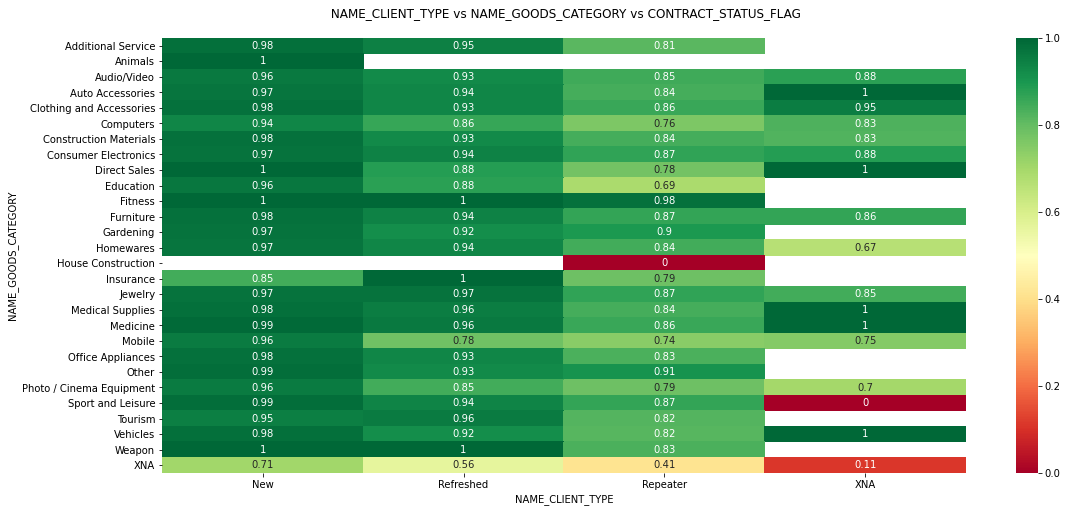

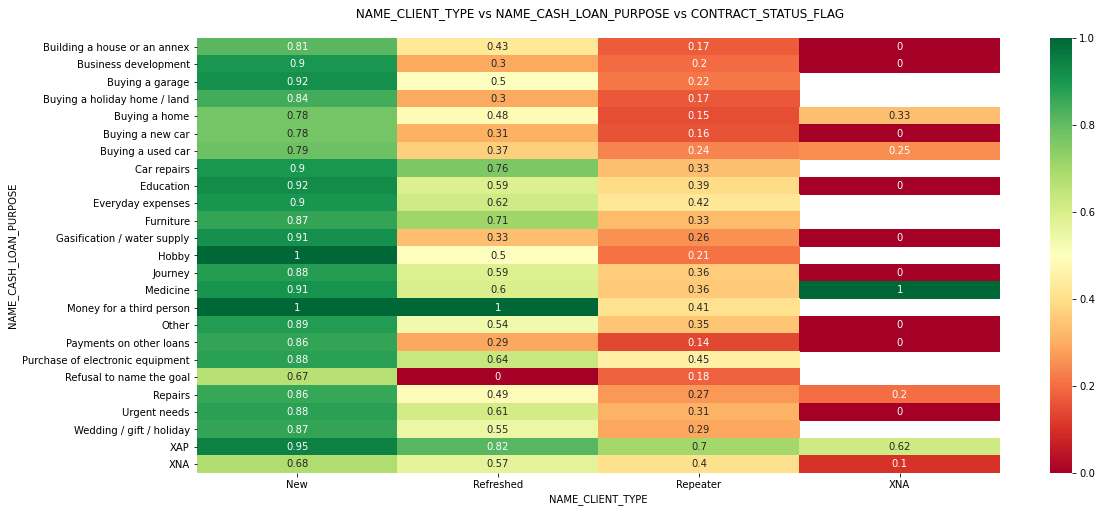

In [149]:
plt.figure(figsize=([18,8]))
res=pd.pivot_table(data=prev_app, index='NAME_GOODS_CATEGORY', columns = 'NAME_CLIENT_TYPE', values='CONTRACT_STATUS_FLAG')
plt.title(' NAME_CLIENT_TYPE vs NAME_GOODS_CATEGORY vs CONTRACT_STATUS_FLAG\n', fontsize=12)
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

plt.figure(figsize=([18,8]))
res2=pd.pivot_table(data=prev_app, index='NAME_CASH_LOAN_PURPOSE', columns = 'NAME_CLIENT_TYPE', values='CONTRACT_STATUS_FLAG')
plt.title(' NAME_CLIENT_TYPE vs NAME_CASH_LOAN_PURPOSE vs CONTRACT_STATUS_FLAG\n', fontsize=12)
sns.heatmap(res2, annot=True, cmap='RdYlGn')
plt.show()

Inferences:
- Earlier we saw, most of the loans approved were by new applicants, then we saw most of them were for Animals and Fitness. This heatmap proves gives the correlation between them and we can say most of the new loans are for Animals and Fitness
- We can see loan for fitness is also high by repeaters and refereshed clients
- This also concludes that approval of loans are given is fairly given in all Goods categories.
- Applicants who are repeaters have less likely chance to get the loan approved. This is the case with almost every category on CASH_LOAN_PURPOSE. This would be a loss on business
- New applications are getting preference on cash loans


### Final Analysis

### Merging both Datasets

So far we have analysed the data from both datasets separately. now let us merge them and see what we more insights we can draw

In [150]:
merge_data= pd.merge(applications, prev_app, how='inner', on='SK_ID_CURR')

In [151]:
merge_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,DOCUMENTS_PROVIDED,GENDER,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CONTRACT_STATUS_FLAG
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary,Single,House / apartment,0.018801,9461,NaN,3648.0,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,Male,21-30,High,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,1
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,NaN,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1,Female,41-50,High,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,1
2,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,NaN,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1,Female,41-50,High,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,1


In [152]:
merge_data.shape

(1412088, 70)

In [153]:
merge_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,DOCUMENTS_PROVIDED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,CONTRACT_STATUS_FLAG
count,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,2593.000000,1.412088e+06,1412088.0,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06,1.412088e+06
mean,2.784737e+05,8.651869e-02,4.047928e-01,1.733539e+05,5.878315e+05,2.702827e+04,5.277410e+05,2.075113e-02,1.632290e+04,56.226379,5.003625e+03,1.0,8.063194e-01,1.817344e-01,9.992444e-01,2.823917e-01,7.239634e-02,2.150455e+00,2.059634e+00,2.037582e+00,7.356340e-02,2.220541e-01,1.739856e-01,1.084725e+03,5.489743e-03,6.033618e-03,3.410694e-02,2.666569e-01,3.197676e-01,2.576021e+00,4.421889e+01,9.365755e-01,1.922745e+06,1.239827e+04,1.752950e+05,1.963880e+05,1.753201e+05,1.247876e+01,9.964450e-01,8.805428e+02,3.150260e+02,1.256604e+01,6.269524e-01
std,1.028103e+05,2.811285e-01,7.172508e-01,1.986690e+05,3.849617e+05,1.395056e+04,3.532547e+05,1.334804e-02,4.344553e+03,21.165793,3.551343e+03,0.0,3.951816e-01,3.856256e-01,2.747814e-02,4.501631e-01,2.591431e-01,9.006098e-01,4.957995e-01,4.886602e-01,2.610591e-01,4.156275e-01,3.790972e-01,8.000467e+02,7.706058e-02,1.002466e-01,2.013232e-01,9.272154e-01,8.784035e-01,2.268701e+00,1.190215e+01,2.980044e-01,5.327060e+05,1.457412e+04,2.936552e+05,3.195049e+05,2.936769e+05,3.331575e+00,5.951793e-02,7.836616e+02,7.699274e+03,1.448787e+01,4.836148e-01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,1.893680e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.683000e+04,2.385000e+05,1.003200e-02,1.274000e+04,42.000000,2.001000e+03,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,1.000000e+00,1.461365e+06,2.467755e+03,1.975500e+04,2.489850e+04,1.975500e+04,1.000000e+01,1.000000e+00,2.710000e+02,-1.000000e+00,0.000000e+00,0.000000e+00
50%,2.789865e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.493900e+04,4.500000e+05,1.885000e-02,1.604600e+04,63.000000,4.508000e+03,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,1.000000e+00,1.922704e+06,8.253225e+03,7.092000e+04,8.063100e+04,7.092

In [154]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412088 entries, 0 to 1412087
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1412088 non-null  int64   
 1   TARGET                       1412088 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1412088 non-null  object  
 3   FLAG_OWN_CAR                 1412088 non-null  object  
 4   FLAG_OWN_REALTY              1412088 non-null  object  
 5   CNT_CHILDREN                 1412088 non-null  int64   
 6   AMT_INCOME_TOTAL             1412088 non-null  float64 
 7   AMT_CREDIT_x                 1412088 non-null  float64 
 8   AMT_ANNUITY_x                1412088 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412088 non-null  float64 
 10  NAME_INCOME_TYPE             1412088 non-null  object  
 11  NAME_EDUCATION_TYPE          1412088 non-null  object  
 12  NAME_FAMILY_STATUS          

In [155]:
# let us divide the merged dataset again in two parts - Defaulters and Non-Defaulters

merge_df_0= merge_data[merge_data.TARGET == 0]
merge_df_1= merge_data[merge_data.TARGET == 1]

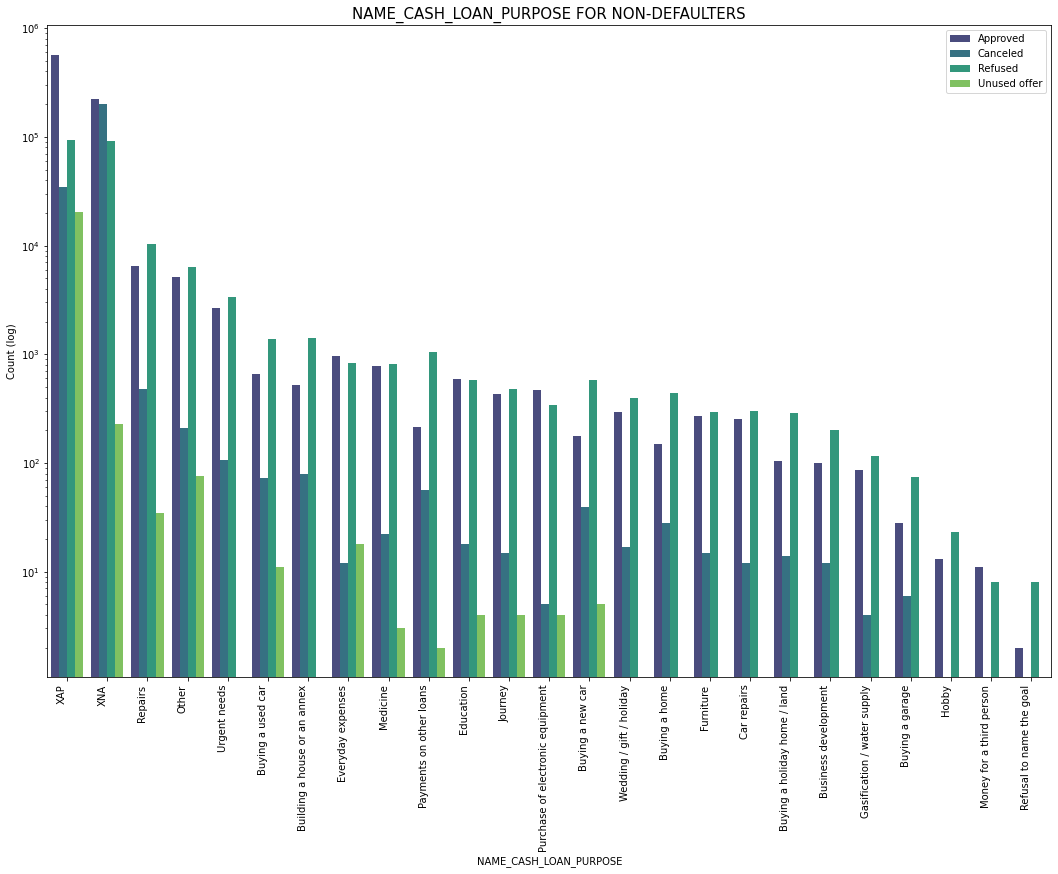

In [156]:
# Let us look at the data based on cash loans purpose for both non defaulters and defaulters and try to get some insights.

plt.figure(figsize=(18,12))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=merge_df_0, hue= 'NAME_CONTRACT_STATUS', palette= "viridis", order=merge_df_0['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.ylabel("Count (log)", fontsize= 10)
plt.title('NAME_CASH_LOAN_PURPOSE FOR NON-DEFAULTERS', fontsize=15) 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')
    
plt.show()

The above graph shows Trend about the Targetted people against their previous applications.
- It seems that majority of the loans are requested for repairs and urgent needs 
- The people who are Non-defaulters and pay the loans on time, have been refused to give loans by bank. This may affect the business.
- The dataset contains lot of missing information. A majority of them are XAP and XNA. Bank should collect more relevant information about these clients

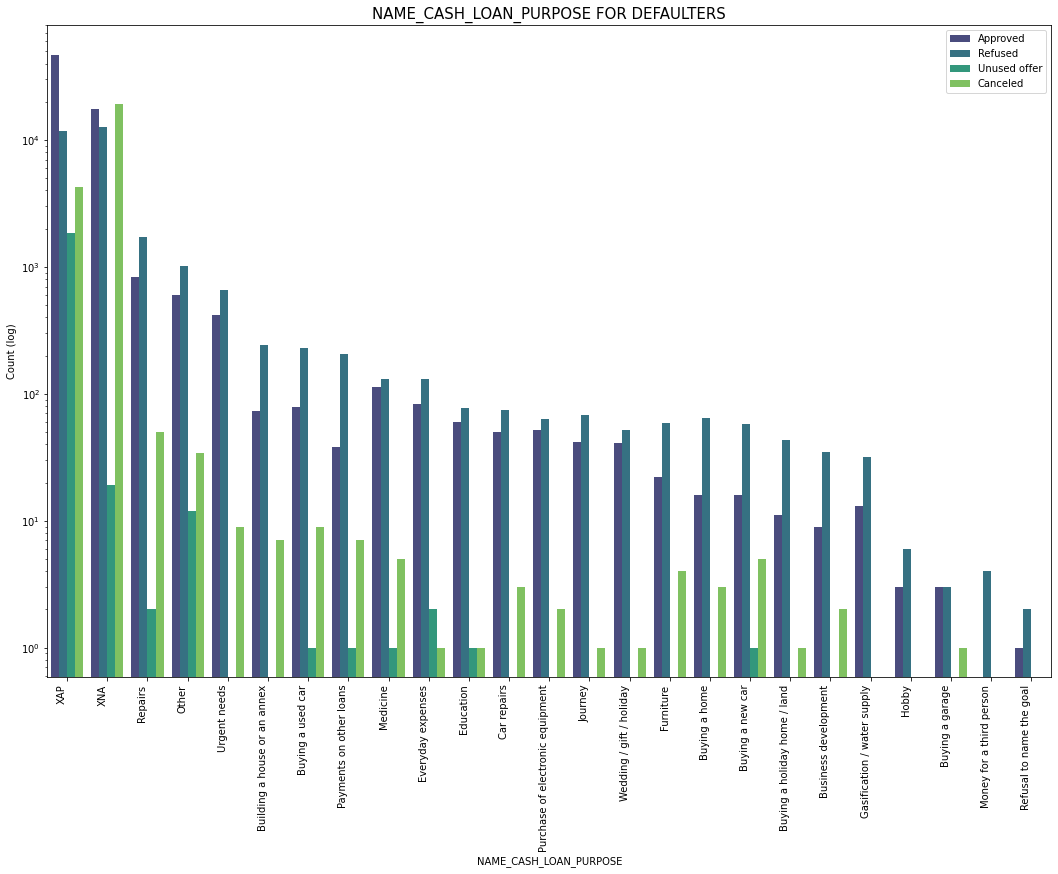

In [157]:
plt.figure(figsize=(18,12))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=merge_df_1, hue= 'NAME_CONTRACT_STATUS', palette= "viridis", order=merge_df_1['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.ylabel("Count (log)", fontsize= 10)
plt.title('NAME_CASH_LOAN_PURPOSE FOR DEFAULTERS', fontsize=15) 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')
    
plt.show()

The above graph shows Trend about the people who are likely to be defaulters against their previous applications status

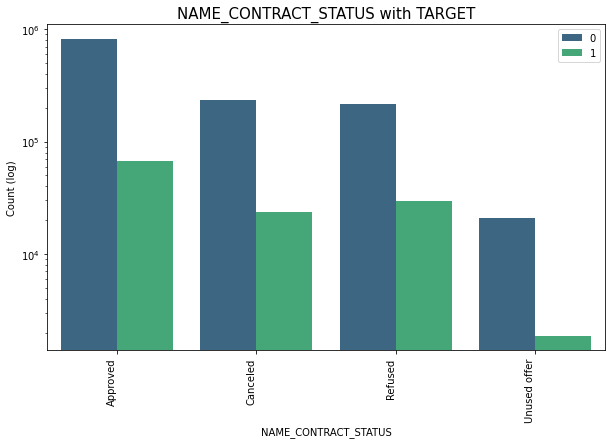

In [158]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_CONTRACT_STATUS', data=merge_data, hue= 'TARGET', palette= "viridis", order=merge_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True).index)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=10)     
plt.title('NAME_CONTRACT_STATUS with TARGET' , fontsize=15) 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')
    
plt.show()

- People who were approved of loans earlier defaulted less. 
- people who were refused of loans defaulted more


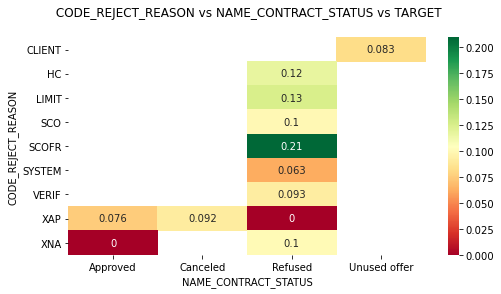

In [159]:
plt.figure(figsize=([8,4]))
res=pd.pivot_table(data=merge_data, index='CODE_REJECT_REASON', columns = 'NAME_CONTRACT_STATUS', values='TARGET')
plt.title(' CODE_REJECT_REASON vs NAME_CONTRACT_STATUS vs TARGET\n', fontsize=12)
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

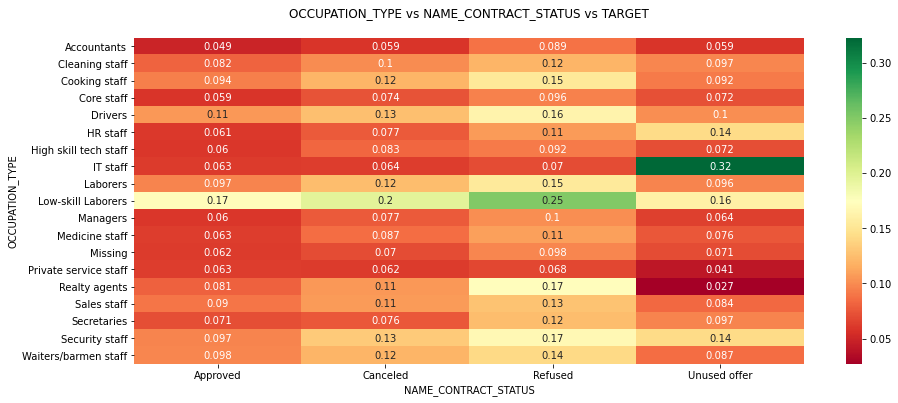

In [160]:
plt.figure(figsize=([15,6]))
res=pd.pivot_table(data=merge_data, index='OCCUPATION_TYPE', columns = 'NAME_CONTRACT_STATUS', values='TARGET')
plt.title('OCCUPATION_TYPE vs NAME_CONTRACT_STATUS vs TARGET\n', fontsize=12)
sns.heatmap(res, annot=True, cmap='RdYlGn')

plt.show()


- loan refused by bank are mostly for low skilled labourers
- IT staff have more unsed offers


## Final Inferences / Recommendations

Based on the complete Analysis, we can recommend few observations
- The bank should categorize every new client into 2 categories: high risk or low risk based on whether that person’s probability of default.
- There were a lot of missing information in the data and bank should collect all relevant information to infer more accurately
- The people who are Non-defaulters and pay the loans on time, have been refused to give loans by bank. This may affect the - business.
- Applicants who are unemployed and are on maternity leave are more likely to be defaulters. These are high risk applicants
- Applicants who are single are high risk as they are more likely to be defaulters
